In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import math as mt
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, matthews_corrcoef,cohen_kappa_score
import lightgbm as lgb

In [3]:
data= pd.read_csv('data01.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


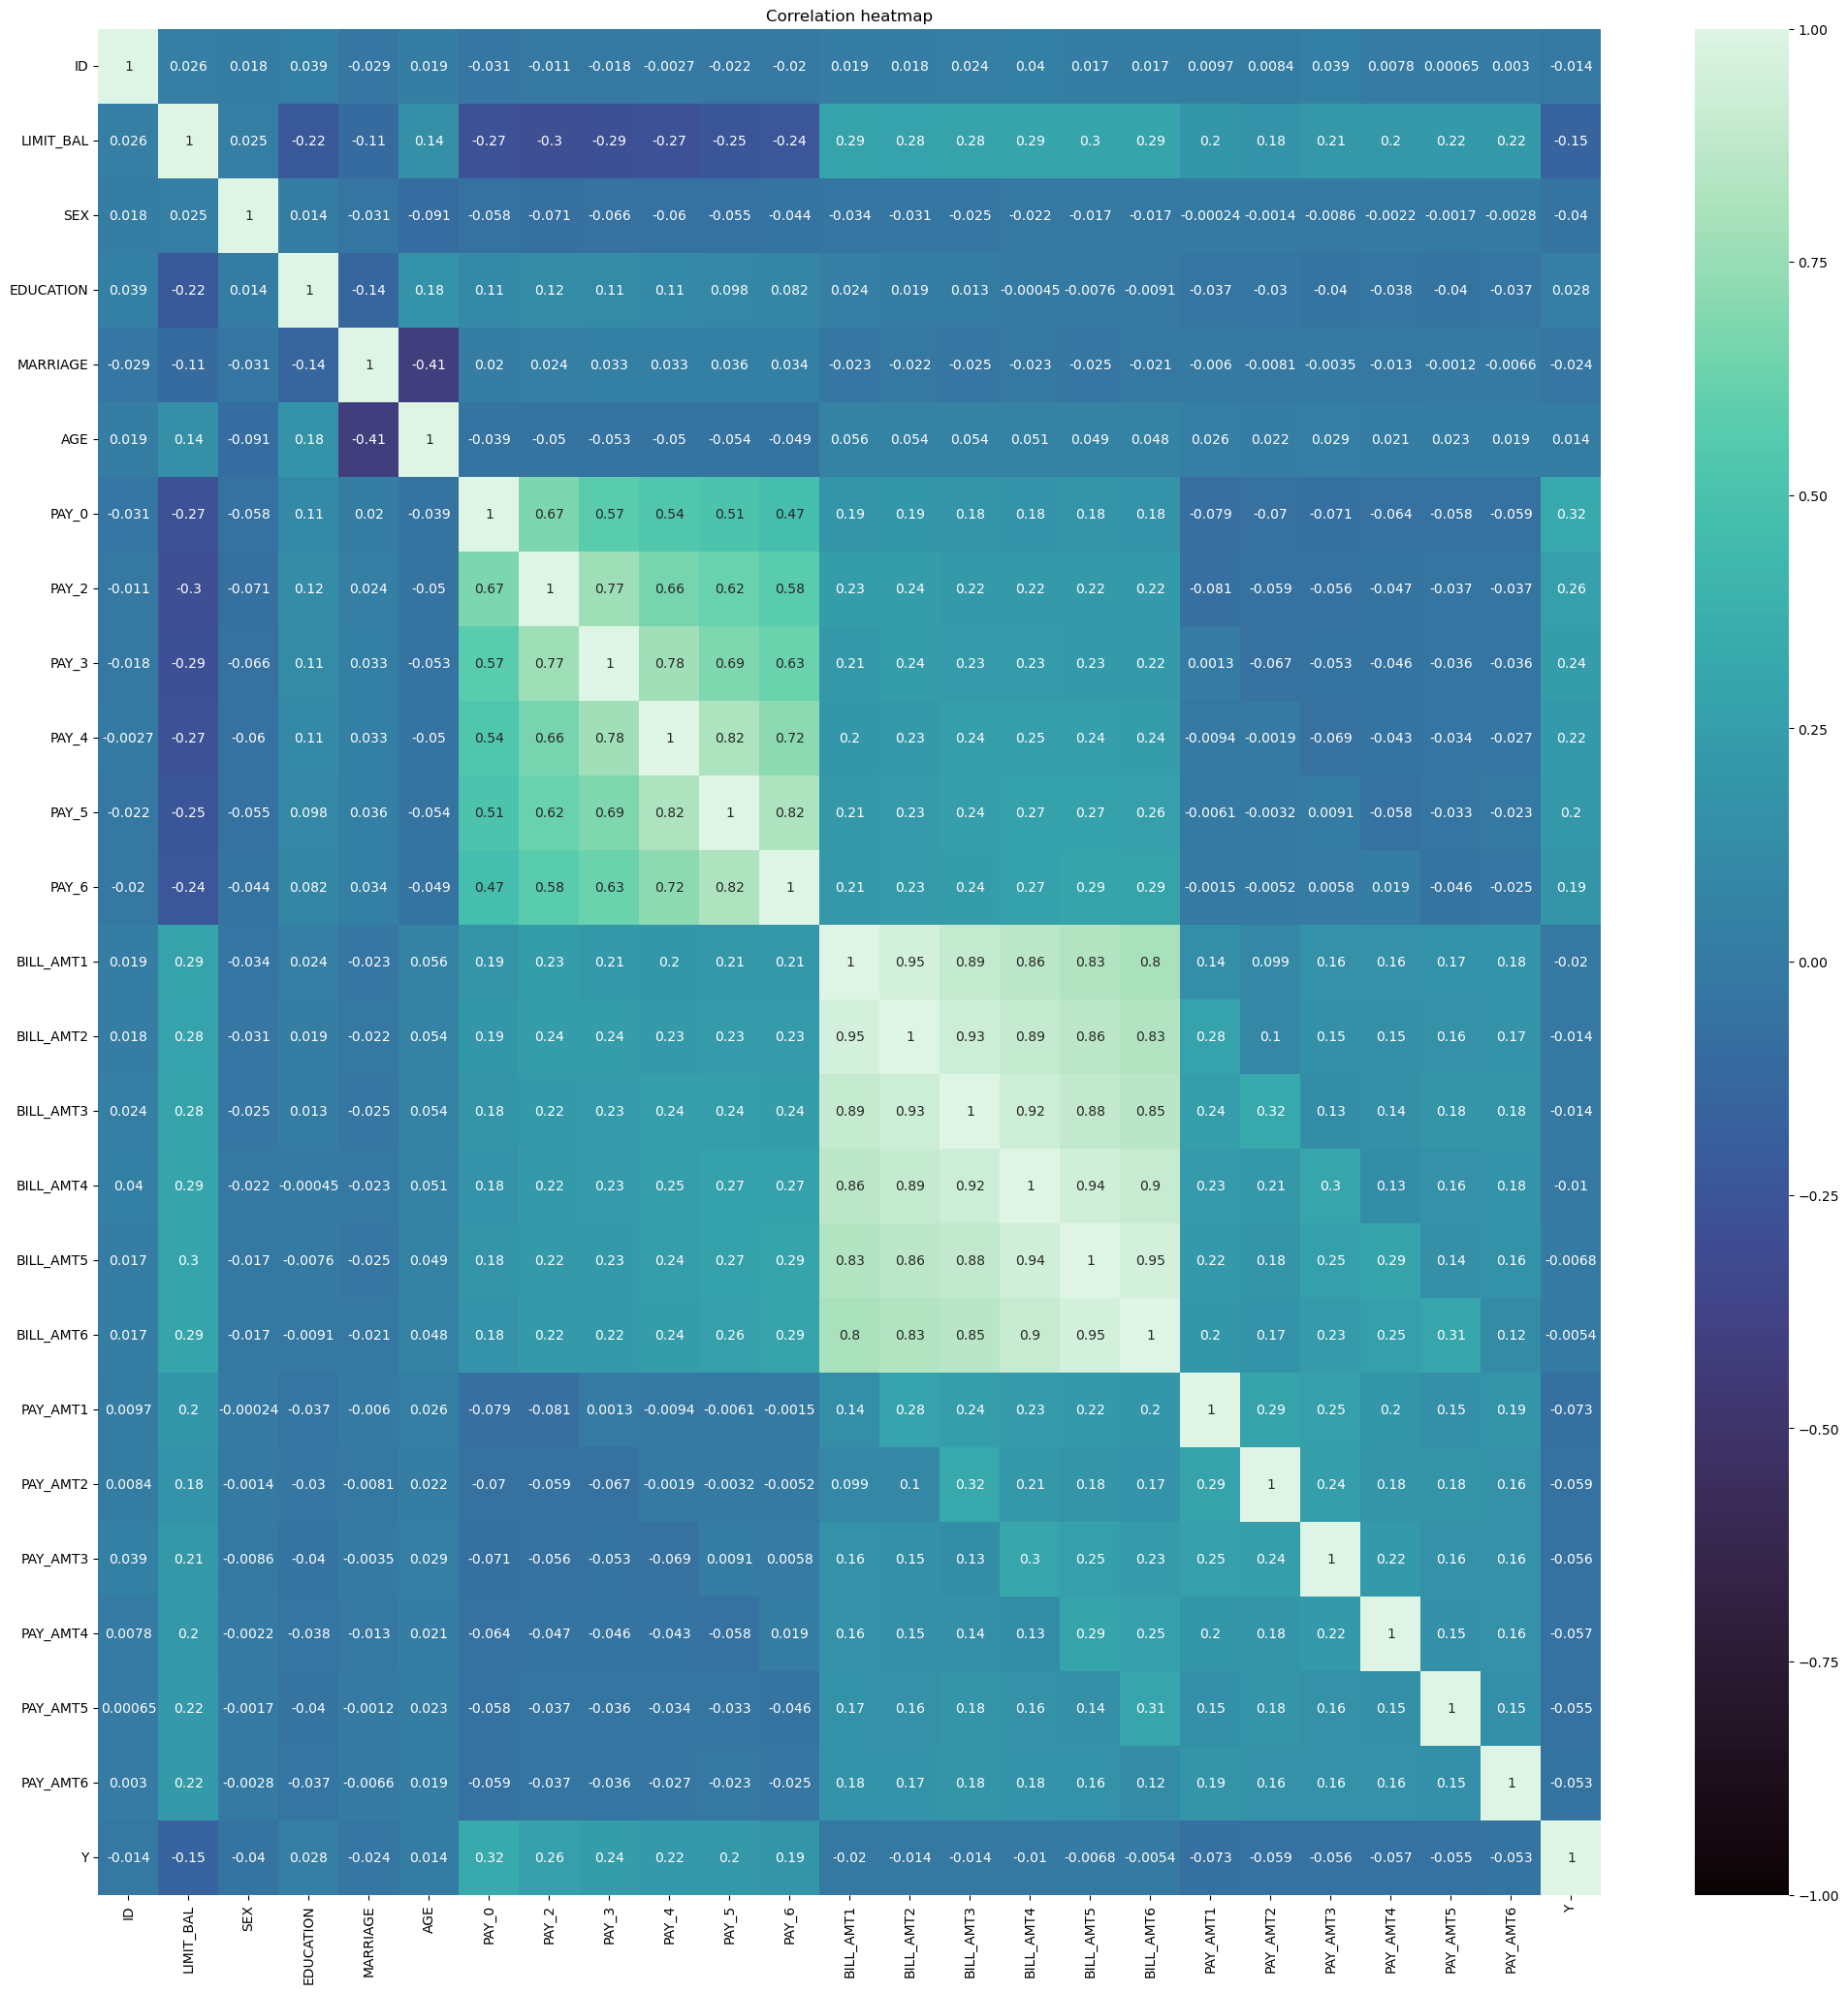

In [6]:
corr= data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.title('Correlation heatmap')
plt.show()

In [7]:
data["pay_avg"]=(data["PAY_0"]+data["PAY_2"]+data["PAY_3"]+data["PAY_4"]+data["PAY_5"]+data["PAY_6"])/6
data["bill_amt_avg"]=(data["BILL_AMT1"]+data["BILL_AMT2"]+data["BILL_AMT3"]+data["BILL_AMT4"]+data["BILL_AMT5"]+data["BILL_AMT6"])/6
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,pay_avg,bill_amt_avg
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-0.333333,1284.000000
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.500000,2846.166667
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.000000,16942.166667
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.000000,38555.666667
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-0.333333,18223.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0.000000,120891.500000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,-0.666667,3530.333333
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,1.333333,11749.333333
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,-0.166667,44435.166667


In [8]:
data=data.drop(['ID','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',"BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis=1)

In [9]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,pay_avg,bill_amt_avg
0,20000,2,2,1,24,0,689,0,0,0,0,1,-0.333333,1284.000000
1,120000,2,2,2,26,0,1000,1000,1000,0,2000,1,0.500000,2846.166667
2,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0,0.000000,16942.166667
3,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0,0.000000,38555.666667
4,50000,1,2,1,57,2000,36681,10000,9000,689,679,0,-0.333333,18223.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,8500,20000,5003,3047,5000,1000,0,0.000000,120891.500000
29996,150000,1,3,2,43,1837,3526,8998,129,0,0,0,-0.666667,3530.333333
29997,30000,1,2,2,37,0,0,22000,4200,2000,3100,1,1.333333,11749.333333
29998,80000,1,3,1,41,85900,3409,1178,1926,52964,1804,1,-0.166667,44435.166667


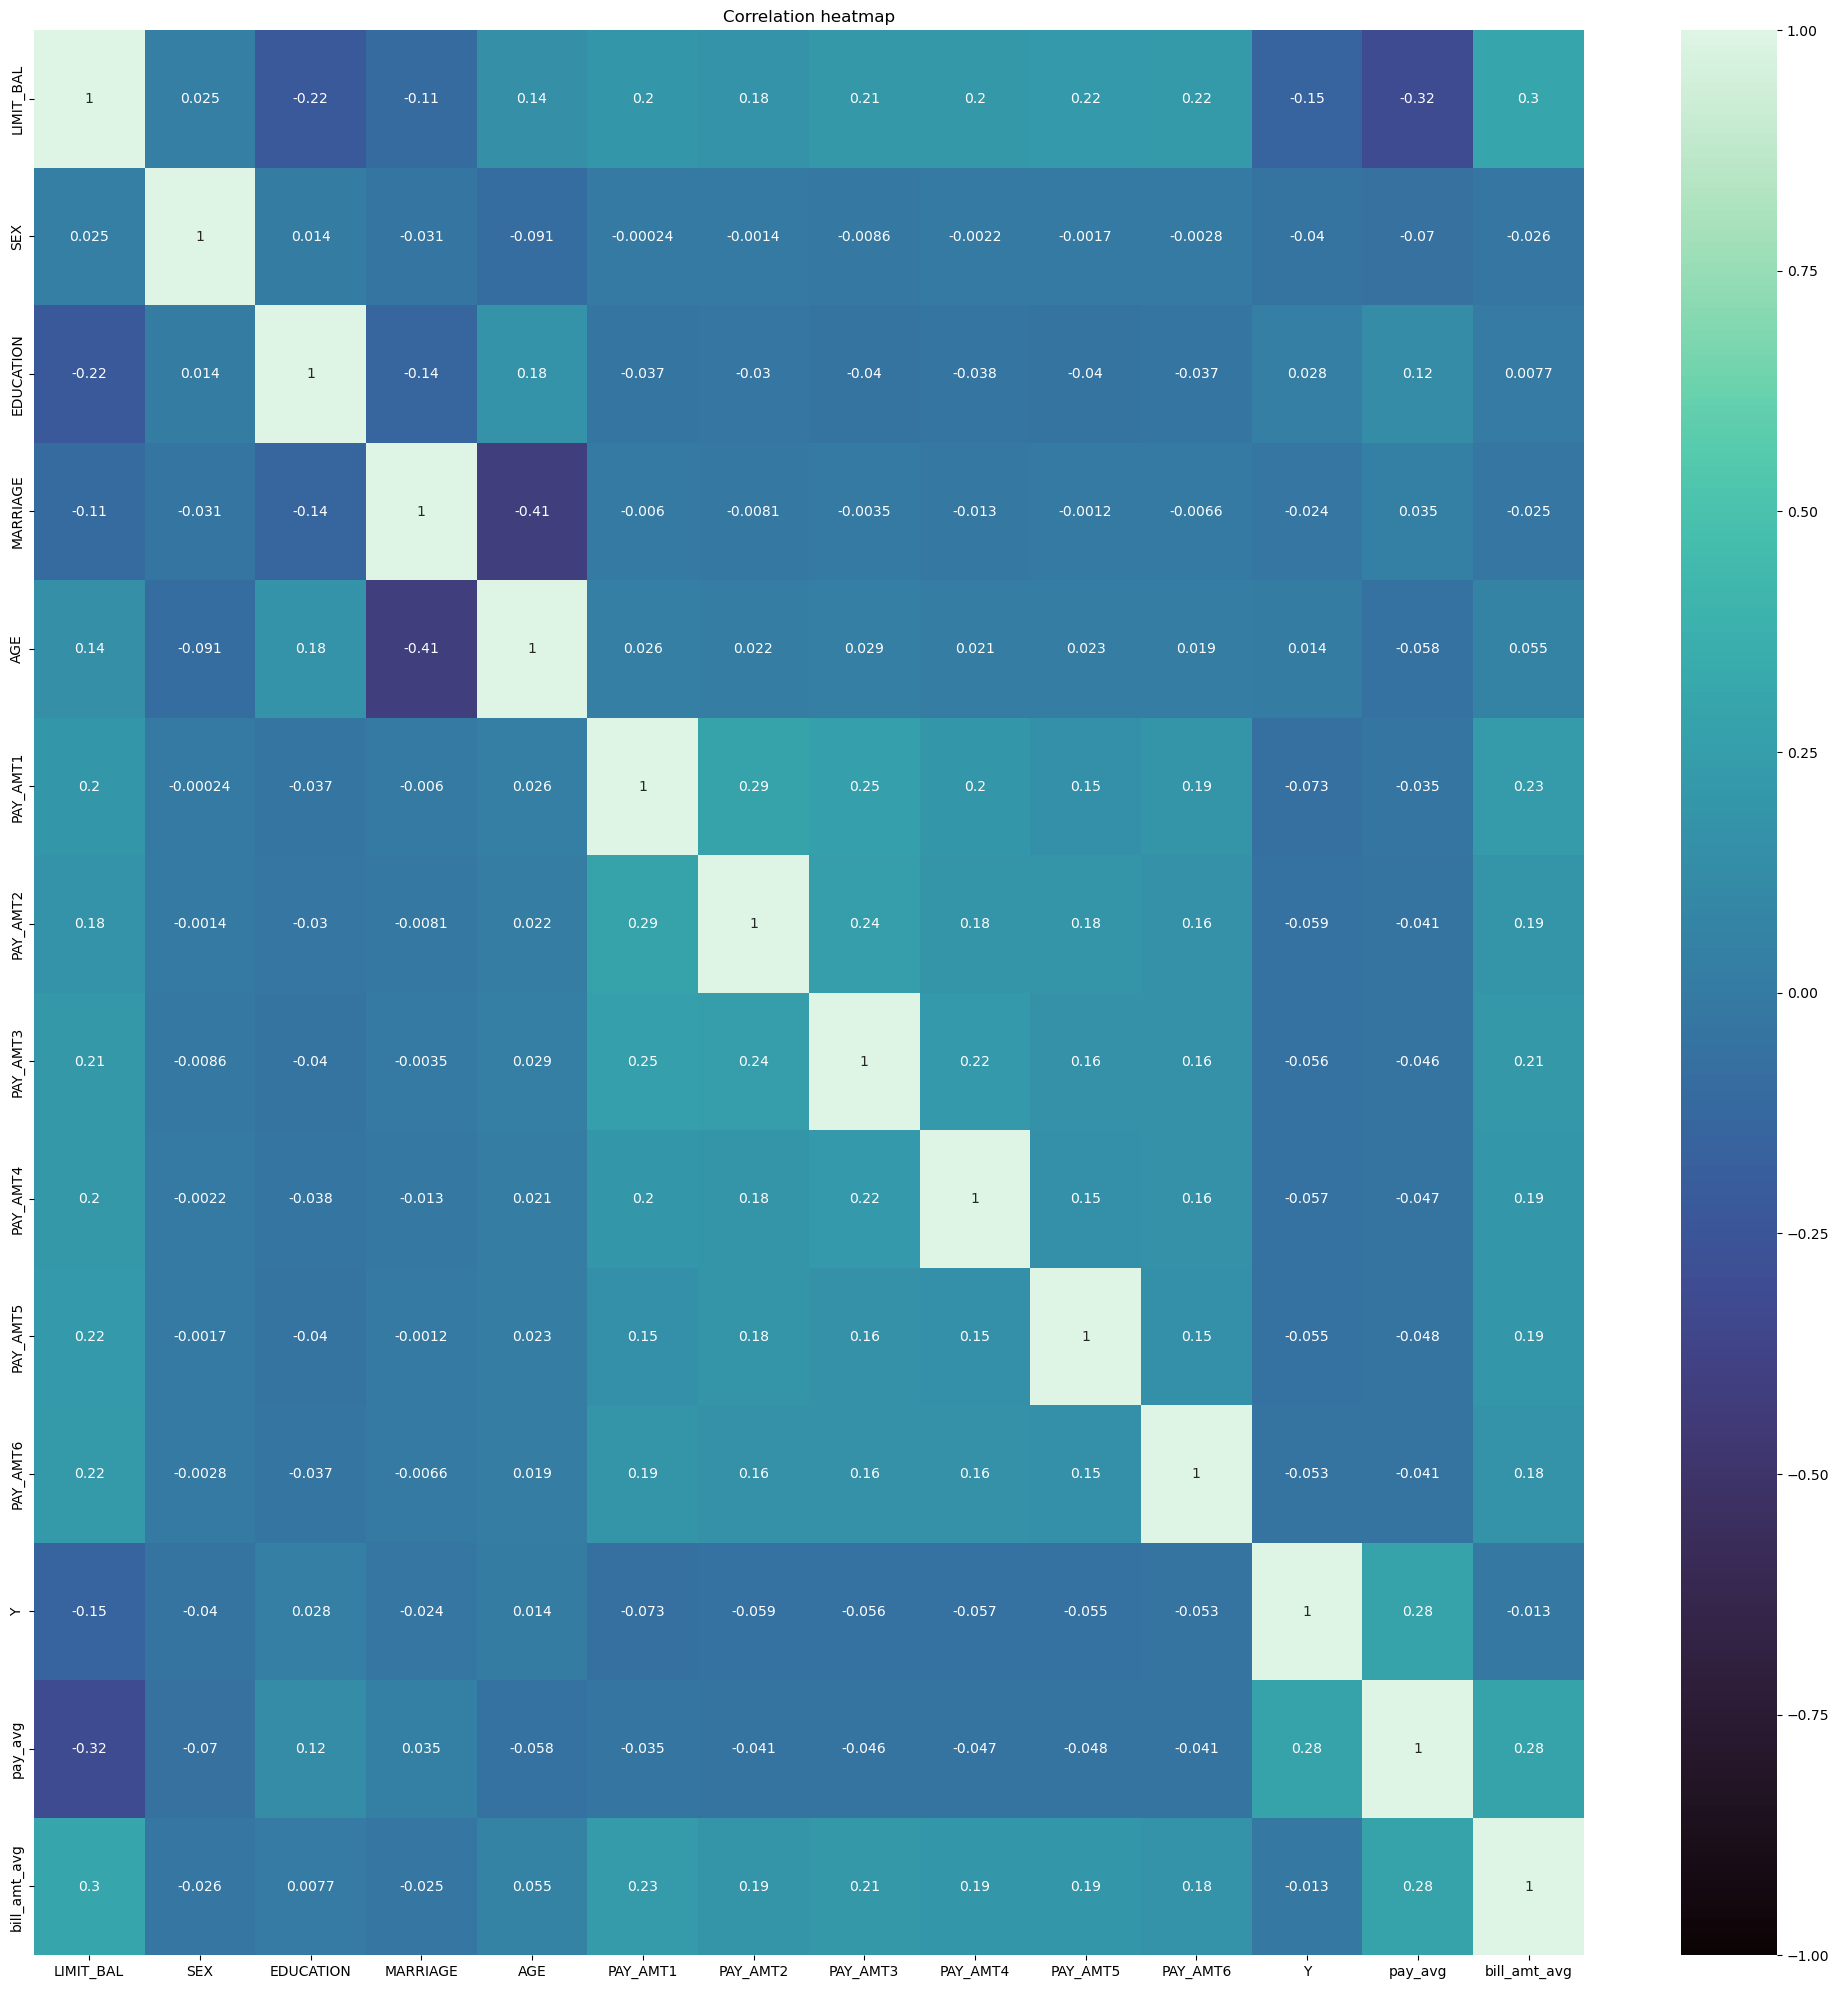

In [10]:
corr= data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.title('Correlation heatmap')
plt.show()

In [11]:
data['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733,0.489129,1.000000,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.853133,0.790349,0.000000,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,30000.0,1.551867,0.521970,0.000000,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,7.900000e+01
PAY_AMT1,30000.0,5663.580500,16563.280354,0.000000,1000.000000,2100.000000,5006.000000,8.735520e+05
PAY_AMT2,30000.0,5921.163500,23040.870402,0.000000,833.000000,2009.000000,5000.000000,1.684259e+06
PAY_AMT3,30000.0,5225.681500,17606.961470,0.000000,390.000000,1800.000000,4505.000000,8.960400e+05
PAY_AMT4,30000.0,4826.076867,15666.159744,0.000000,296.000000,1500.000000,4013.250000,6.210000e+05
PAY_AMT5,30000.0,4799.387633,15278.305679,0.000000,252.500000,1500.000000,4031.500000,4.265290e+05


# preprocess

In [12]:
def preprocess_input(df):
    
    y=df[['Y']]
    x=df.drop('Y',axis=1).copy()
    
    #scale x with a standard scaler
    scaler = StandardScaler()
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    
    return x,y

In [13]:
x,y=preprocess_input(data)

In [14]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pay_avg,bill_amt_avg
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.153635,-0.690692
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0.694835,-0.665997
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0.185753,-0.443170
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0.185753,-0.101507
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.153635,-0.422920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0.185753,1.200047
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.493024,-0.655182
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.543306,-0.525257
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,0.016059,-0.008564


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     30000 non-null  int64  
 1   SEX           30000 non-null  int64  
 2   EDUCATION     30000 non-null  int64  
 3   MARRIAGE      30000 non-null  int64  
 4   AGE           30000 non-null  int64  
 5   PAY_AMT1      30000 non-null  int64  
 6   PAY_AMT2      30000 non-null  int64  
 7   PAY_AMT3      30000 non-null  int64  
 8   PAY_AMT4      30000 non-null  int64  
 9   PAY_AMT5      30000 non-null  int64  
 10  PAY_AMT6      30000 non-null  int64  
 11  Y             30000 non-null  int64  
 12  pay_avg       30000 non-null  float64
 13  bill_amt_avg  30000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 3.2 MB


In [16]:
y

,Y
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [17]:
{column:len(x[column].unique()) for column in x.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'EDUCATION': 7,
 'MARRIAGE': 4,
 'AGE': 56,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'pay_avg': 47,
 'bill_amt_avg': 27370}

In [18]:
x['Y']=y
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pay_avg,bill_amt_avg,Y
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.153635,-0.690692,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0.694835,-0.665997,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0.185753,-0.443170,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0.185753,-0.101507,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.153635,-0.422920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0.185753,1.200047,0
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.493024,-0.655182,0
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.543306,-0.525257,1
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,0.016059,-0.008564,1


In [19]:
#3 ECOD
from pyod.models.ecod import ECOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

ecod=ECOD(contamination=outliers_fraction)
ecod.fit(x,y)
# predict raw anomaly score
scores_pred = ecod.decision_function(x) * -1

# prediction of a datapoint category outlier or inlier
y_pred = ecod.predict(x)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ECOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yecod=pd.DataFrame(y_pred,columns=['out'])
dfecod=x.loc[yecod[yecod['out'] == 0].index]
dfecod = dfecod.reset_index(drop=True)
dfecod

Outlier Detecter : ECOD
Number of Outliers : 3000 Number of Inliers : 27000
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pay_avg,bill_amt_avg,Y
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.153635,-0.690692,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0.694835,-0.665997,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0.185753,-0.443170,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0.185753,-0.101507,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.153635,-0.422920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0.185753,1.200047,0
26996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.493024,-0.655182,0
26997,-1.059646,-1.234323,0.185828,0.858557,0.164303,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.543306,-0.525257,1
26998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,0.016059,-0.008564,1


In [20]:
y=dfecod[['Y']]
x=dfecod.drop('Y',axis=1).copy()

# Training

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [22]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, verbose=1, scoring='neg_mean_squared_error')

In [23]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 5/5

In [24]:
feat_names = list(sfs1.k_feature_names_)
feat_names

['MARRIAGE', 'PAY_AMT1', 'PAY_AMT2', 'pay_avg', 'bill_amt_avg']

In [25]:
feature_names=x.columns
feature_names

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pay_avg',
       'bill_amt_avg'],
      dtype='object')

In [26]:
fn=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pay_avg',
       'bill_amt_avg']

In [27]:
pip install Boruta==0.1.1

Note: you may need to restart the kernel to use updated packages.


In [28]:
from boruta import BorutaPy

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
new_rf = RandomForestRegressor(n_jobs = -1, max_depth = 5)

boruta_selector = BorutaPy(new_rf, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(x), np.array(y))

boruta_ranking = boruta_selector.ranking_
boruta_ranking

array([1, 7, 6, 5, 4, 1, 1, 1, 1, 3, 2, 1, 1])

In [31]:
selected_features = np.array(fn)[boruta_ranking<=2]

In [32]:
boruta_ranking = pd.DataFrame(data=boruta_ranking, index=x.columns.values, columns=['values']) 
boruta_ranking['Variable'] = boruta_ranking.index 
boruta_ranking.sort_values(['values'], ascending=True, inplace=True)

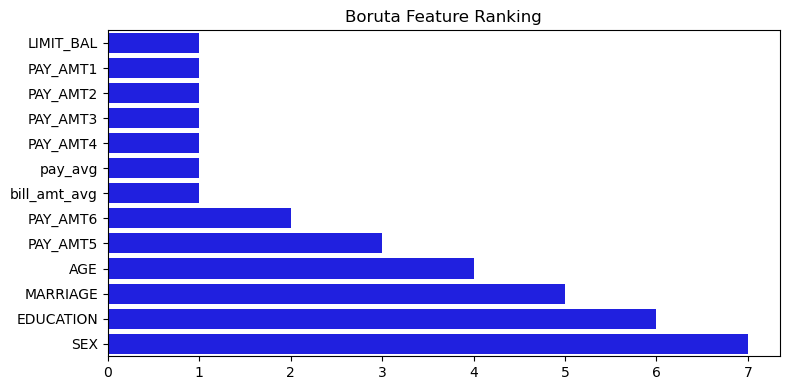

In [33]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x='values',y='Variable',data=boruta_ranking, color='b')
plt.title('Boruta Feature Ranking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     27000 non-null  float64
 1   SEX           27000 non-null  float64
 2   EDUCATION     27000 non-null  float64
 3   MARRIAGE      27000 non-null  float64
 4   AGE           27000 non-null  float64
 5   PAY_AMT1      27000 non-null  float64
 6   PAY_AMT2      27000 non-null  float64
 7   PAY_AMT3      27000 non-null  float64
 8   PAY_AMT4      27000 non-null  float64
 9   PAY_AMT5      27000 non-null  float64
 10  PAY_AMT6      27000 non-null  float64
 11  pay_avg       27000 non-null  float64
 12  bill_amt_avg  27000 non-null  float64
dtypes: float64(13)
memory usage: 2.7 MB


In [35]:
xb=x[['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'pay_avg', 'bill_amt_avg']]
yb=y
xf=x[['MARRIAGE', 'PAY_AMT1', 'PAY_AMT2', 'pay_avg', 'bill_amt_avg']]
yf=y

In [36]:
#data balancing
Xbad=xb
ybad=yb
Xfsm=xf
yfsm=yf
Xbsm=xb
ybsm=yb
Xfad=xf
yfad=yf

In [37]:
Xbad

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,pay_avg,bill_amt_avg
0,-1.136720,-0.341942,-0.227086,-0.296801,-0.308063,-0.153635,-0.690692
1,-0.365981,-0.341942,-0.213588,-0.240005,-0.244230,0.694835,-0.665997
2,-0.597202,-0.250292,-0.191887,-0.240005,-0.244230,0.185753,-0.443170
3,-0.905498,-0.221191,-0.169361,-0.228645,-0.237846,0.185753,-0.101507
4,-0.905498,-0.221191,1.335034,0.271165,0.266434,-0.153635,-0.422920
...,...,...,...,...,...,...,...
26995,0.404759,0.171250,0.611048,-0.012648,-0.113564,0.185753,1.200047
26996,-0.134759,-0.231032,-0.103955,0.214255,-0.299828,-0.493024,-0.655182
26997,-1.059646,-0.341942,-0.256990,0.952725,-0.039964,1.543306,-0.525257
26998,-0.674276,4.844316,-0.109033,-0.229895,-0.185120,0.016059,-0.008564


In [38]:
from imblearn.over_sampling import ADASYN, SMOTE

In [39]:
def oversampling(Xbad,ybad,Xfsm,yfsm,Xbsm,ybsm,Xfad,yfad):
    ada=ADASYN()
    Xbad,ybad=ada.fit_resample(Xbad,ybad)
    Xfad,yfad=ada.fit_resample(Xfad,yfad)
    smt=SMOTE()
    Xfsm,yfsm=smt.fit_resample(Xfsm,yfsm)
    Xbsm,ybsm=smt.fit_resample(Xbsm,ybsm)
    return Xbad,ybad,Xfsm,yfsm,Xbsm,ybsm,Xfad,yfad

In [40]:
Xa1,ya1,Xs1,ys1,Xs2,ys2,Xa2,ya2=oversampling(Xbad,ybad,Xfsm,yfsm,Xbsm,ybsm,Xfad,yfad)

In [41]:
ys1

,Y
0,1
1,1
2,0
3,0
4,0
...,...
42281,1
42282,1
42283,1
42284,1


In [42]:
x_traina1, x_testa1, y_traina1, y_testa1 = train_test_split(Xa1,ya1,train_size=0.7,random_state=123)

In [43]:
x_traina2, x_testa2, y_traina2, y_testa2 = train_test_split(Xa2,ya2,train_size=0.7,random_state=123)

In [44]:
x_trains1, x_tests1, y_trains1, y_tests1 = train_test_split(Xs1,ys1,train_size=0.7,random_state=123)

In [45]:
x_trains2, x_tests2, y_trains2, y_tests2 = train_test_split(Xs2,ys2,train_size=0.7,random_state=123)

In [46]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y,train_size=0.7,random_state=123)

In [49]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("---------------------TRAINING RESULTS----------------------- \n")
    
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    
    cm = confusion_matrix(y_train, y_train_pred)
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    specificity = tn/(tn+fp)
    
    print(f" CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f" ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f" CLASSIFICATION REPORT:\n{clf_report}")
    print(f"\n MCC = {matthews_corrcoef(y_train, y_train_pred)}")
    print("\n specificity = ",specificity)
    print("\n Cohen Kappa = ",cohen_kappa_score(y_train, y_train_pred))
    print("\n F1 Score = ",f1_score(y_train, y_train_pred))
    #print("\n Log Loss = ",log_loss(y_train, y_train_pred))
    Pre=tp / (tp + fp)
    print("\n Precision = ",Pre)
    Rec=tp / (tp + fn)
    print("\n Recall = ",Rec)
    #print("\n GMean = ",mt.sqrt(Pre*Rec))
    #print("\nBrier Loss = ",(y_train_pred-y_train)*(y_train_pred-y_train))
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print("\n 10 fold cv = ",np.mean(scores))
    cv1 = RepeatedStratifiedKFold(n_splits=5, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv1, scoring='accuracy')
    print("\n 5 fold cv = ",np.mean(scores))


    print("-----------------------TESTING RESULTS-------------------------- \n")
    
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    cm = confusion_matrix(y_test, y_test_pred)
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    specificity = tn/(tn+fp)
    print(f" CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f" ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f" CLASSIFICATION REPORT:\n{clf_report}")
    print(f"\n MCC: = {matthews_corrcoef(y_test, y_test_pred)}")
    print("\n specificity = ",specificity)
    print("\n Cohen Kappa = ",cohen_kappa_score(y_test, y_test_pred))
    print("\n F1 Score = ",f1_score(y_test, y_test_pred))
    #print("\n Log Loss = ",log_loss(y_test, y_test_pred))
    Pre=tp / (tp + fp)
    print("\n Precision = ",Pre)
    Rec=tp / (tp + fn)
    print("\n Recall = ",Rec)
    #print("\n GMean = ",mt.sqrt(Pre*Rec))
    #print("\nBrier Loss = ",(y_test_pred-y_test)*(y_test_pred-y_test))
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
    scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    print("\n 10 fold cv = ",np.mean(scores))
    cv1 = RepeatedStratifiedKFold(n_splits=5, random_state=1)
    scores = cross_val_score(model, X_test, y_test, cv=cv1, scoring='accuracy')
    print("\n 5 fold cv = ",np.mean(scores))
    y_proba1 = model.predict_proba(X_test)[:,1]
    print("\n RoC AUC Score:: ",roc_auc_score(y_test, y_proba1,average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba1)
    plt.plot(fpr, tpr)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [50]:
x_tr.shape

(18900, 13)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14454   348]
 [ 3437   661]]
 ACCURACY SCORE:
0.7997
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.807892     0.655104  0.799735      0.731498      0.774764
recall         0.976490     0.161298  0.799735      0.568894      0.799735
f1-score       0.884226     0.258860  0.799735      0.571543      0.748631
support    14802.000000  4098.000000  0.799735  18900.000000  18900.000000

 MCC = 0.25257725216611443

 specificity =  0.9764896635589785

 Cohen Kappa =  0.18941139549802855

 F1 Score =  0.2588603877031525

 Precision =  0.6551040634291377

 Recall =  0.1612981942410932

 10 fold cv =  0.7994232804232805

 5 fold cv =  0.7995238095238096
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[6210  131]
 [1494  265]]
 ACCURACY SCORE:
0.7994
 CLASSIFICATION REPORT:
                     0            1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8017654320987656

 RoC AUC Score::  0.7083530313697936


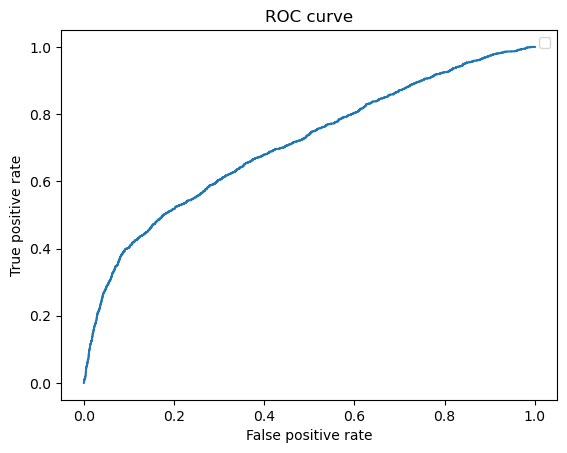

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[9815 5081]
 [5517 9187]]
 ACCURACY SCORE:
0.6420
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.640164      0.643888  0.641959      0.642026      0.642014
recall         0.658902      0.624796  0.641959      0.641849      0.641959
f1-score       0.649398      0.634199  0.641959      0.641798      0.641848
support    14896.000000  14704.000000  0.641959  29600.000000  29600.000000

 MCC = 0.28387518259237515

 specificity =  0.6589017185821697

 Cohen Kappa =  0.2837519164439217

 F1 Score =  0.6341985365180174

 Precision =  0.6438884216428371

 Recall =  0.6247959738846572

 10 fold cv =  0.6417060810810811

 5 fold cv =  0.6415000000000001
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4064 2183]
 [2432 4007]]
 ACCURACY SCORE:
0.6362
 CLASSIFICATION REPORT:
                     0            1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6338088675312235

 RoC AUC Score::  0.6975289372009297


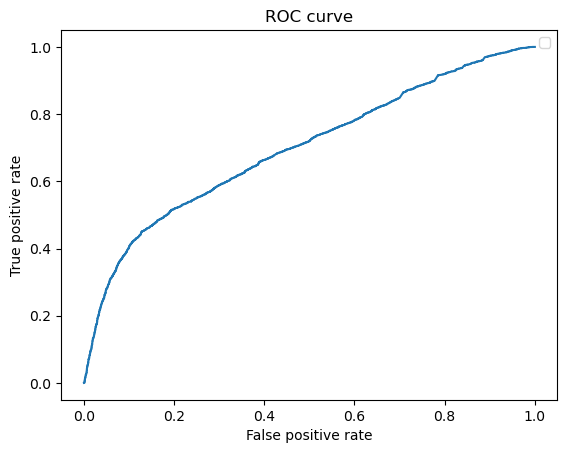

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[9561 5335]
 [5326 9378]]
 ACCURACY SCORE:
0.6398
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.642238      0.637396  0.639831      0.639817      0.639833
recall         0.641850      0.637786  0.639831      0.639818      0.639831
f1-score       0.642044      0.637591  0.639831      0.639817      0.639832
support    14896.000000  14704.000000  0.639831  29600.000000  29600.000000

 MCC = 0.2796347463250613

 specificity =  0.6418501611170784

 Cohen Kappa =  0.27963469461728196

 F1 Score =  0.6375905088894177

 Precision =  0.6373955005777204

 Recall =  0.6377856365614799

 10 fold cv =  0.6396925675675675

 5 fold cv =  0.6396250000000001
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[3965 2282]
 [2275 4164]]
 ACCURACY SCORE:
0.6408
 CLASSIFICATION REPORT:
                     0            1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6384437356283815

 RoC AUC Score::  0.7046006962981927


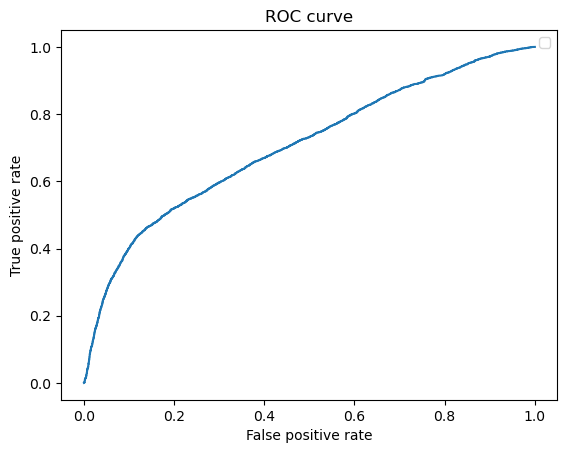

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[8676 6122]
 [5564 9479]]
 ACCURACY SCORE:
0.6084
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.609270      0.607589  0.608391      0.608429      0.608423
recall         0.586295      0.630127  0.608391      0.608211      0.608391
f1-score       0.597562      0.618653  0.608391      0.608107      0.608194
support    14798.000000  15043.000000  0.608391  29841.000000  29841.000000

 MCC = 0.21664055741425042

 specificity =  0.5862954453304501

 Cohen Kappa =  0.2164888912277657

 F1 Score =  0.618652917373711

 Precision =  0.6075892570989039

 Recall =  0.6301269693545171

 10 fold cv =  0.6085152168348444

 5 fold cv =  0.6083609973019671
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[3723 2622]
 [2343 4102]]
 ACCURACY SCORE:
0.6118
 CLASSIFICATION REPORT:
                     0            1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6129710711493354

 RoC AUC Score::  0.671722198074145


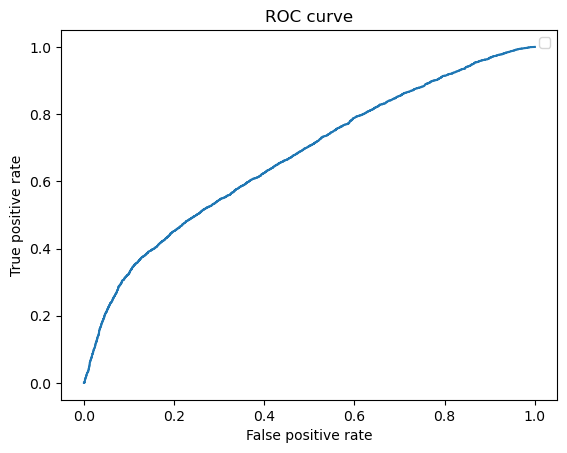

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[9363 5519]
 [5992 8336]]
 ACCURACY SCORE:
0.6059
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.609769      0.601660  0.605923      0.605714      0.605791
recall         0.629149      0.581798  0.605923      0.605474      0.605923
f1-score       0.619307      0.591562  0.605923      0.605435      0.605698
support    14882.000000  14328.000000  0.605923  29210.000000  29210.000000

 MCC = 0.2111878834993227

 specificity =  0.6291493078887246

 Cohen Kappa =  0.21107688459702456

 F1 Score =  0.591562289323351

 Precision =  0.6016600505232768

 Recall =  0.5817978782802904

 10 fold cv =  0.6058849709003766

 5 fold cv =  0.6059294762067785
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[3936 2325]
 [2623 3635]]
 ACCURACY SCORE:
0.6048
 CLASSIFICATION REPORT:
                     0            1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6015652143944838

 RoC AUC Score::  0.6543681969206872


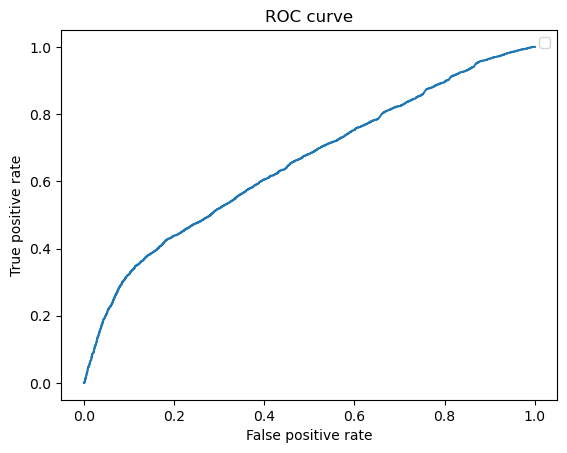

In [50]:
lr=LogisticRegression()
lr.fit(x_tr, y_tr)
evaluate(lr, x_tr, x_te, y_tr, y_te)
lr.fit(x_trains1, y_trains1)
evaluate(lr, x_trains1, x_tests1, y_trains1, y_tests1)
lr.fit(x_trains2, y_trains2)
evaluate(lr, x_trains2, x_tests2, y_trains2, y_tests2)
lr.fit(x_traina1, y_traina1)
evaluate(lr, x_traina1, x_testa1, y_traina1, y_testa1)
lr.fit(x_traina2, y_traina2)
evaluate(lr, x_traina2, x_testa2, y_traina2, y_testa2)

In [59]:
svm=SVC()
svm.fit(x_tr, y_tr)
evaluate(svm, x_tr, x_te, y_tr, y_te)
svm.fit(x_trains1, y_trains1)
evaluate(svm, x_trains1, x_tests1, y_trains1, y_tests1)
svm.fit(x_trains2, y_trains2)
evaluate(svm, x_trains2, x_tests2, y_trains2, y_tests2) 
svm.fit(x_traina1, y_traina1) 
evaluate(svm, x_traina1, x_testa1, y_traina1, y_testa1)
svm.fit(x_traina2, y_traina2)
evaluate(svm, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14356   446]
 [ 3228   870]]
 ACCURACY SCORE:
0.8056
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.816424     0.661094  0.805608      0.738759      0.782745
recall         0.969869     0.212299  0.805608      0.591084      0.805608
f1-score       0.886556     0.321389  0.805608      0.603972      0.764013
support    14802.000000  4098.000000  0.805608  18900.000000  18900.000000

 MCC = 0.2949378951588587

 specificity =  0.9698689366301851

 Cohen Kappa =  0.24142873660467679

 F1 Score =  0.3213889915035094

 Precision =  0.6610942249240122

 Recall =  0.212298682284041

 10 fold cv =  0.8033915343915345

 5 fold cv =  0.8035502645502646
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[6156  185]
 [1429  330]]
 ACCURACY SCORE:
0.8007
 CLASSIFICATION REPORT:
                     0            1  

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14092   710]
 [ 2405  1693]]
 ACCURACY SCORE:
0.8352
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.854216     0.704536  0.835185      0.779376      0.821762
recall         0.952034     0.413128  0.835185      0.682581      0.835185
f1-score       0.900476     0.520843  0.835185      0.710660      0.818162
support    14802.000000  4098.000000  0.835185  18900.000000  18900.000000

 MCC = 0.45170221479223416

 specificity =  0.9520335089852723

 Cohen Kappa =  0.4293761004235257

 F1 Score =  0.5208429472388864

 Precision =  0.7045359966708281

 Recall =  0.413128355295266

 10 fold cv =  0.7829153439153438

 5 fold cv =  0.7829312169312169
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5849  492]
 [1269  490]]
 ACCURACY SCORE:
0.7826
 CLASSIFICATION REPORT:
                     0            1  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.6757563933931507


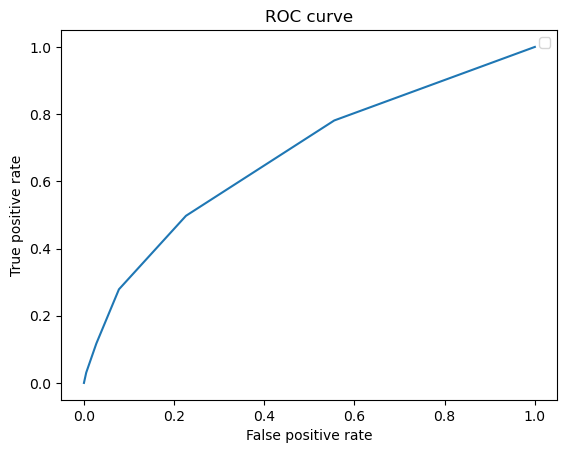

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11278  3618]
 [ 1552 13152]]
 ACCURACY SCORE:
0.8253
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.879034      0.784258  0.825338      0.831646      0.831953
recall         0.757116      0.894450  0.825338      0.825783      0.825338
f1-score       0.813532      0.835737  0.825338      0.824635      0.824563
support    14896.000000  14704.000000  0.825338  29600.000000  29600.000000

 MCC = 0.6574026682857647

 specificity =  0.7571160042964554

 Cohen Kappa =  0.6509770234903101

 F1 Score =  0.8357374340725678

 Precision =  0.784257602862254

 Recall =  0.8944504896626768

 10 fold cv =  0.7369966216216216

 5 fold cv =  0.7317195945945946
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4163 2084]
 [1132 5307]]
 ACCURACY SCORE:
0.7465
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8188314301409793


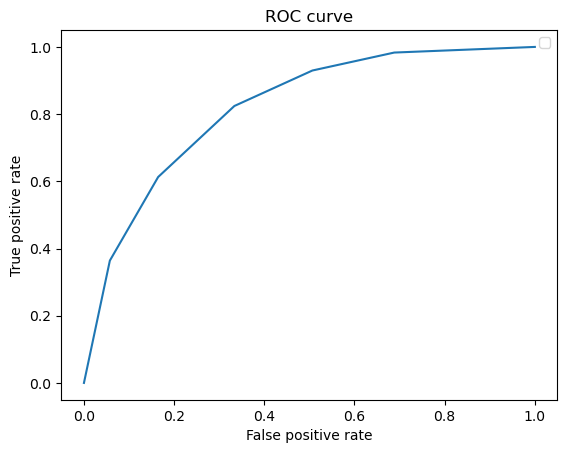

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11312  3584]
 [ 1112 13592]]
 ACCURACY SCORE:
0.8414
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.910496      0.791337  0.841351      0.850916      0.851303
recall         0.759398      0.924374  0.841351      0.841886      0.841351
f1-score       0.828111      0.852698  0.841351      0.840404      0.840325
support    14896.000000  14704.000000  0.841351  29600.000000  29600.000000

 MCC = 0.6927438404025985

 specificity =  0.7593984962406015

 Cohen Kappa =  0.6830327746358503

 F1 Score =  0.8526976160602259

 Precision =  0.7913367489520261

 Recall =  0.9243743199129488

 10 fold cv =  0.7588952702702703

 5 fold cv =  0.7515202702702701
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4217 2030]
 [ 943 5496]]
 ACCURACY SCORE:
0.7656
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8398253618640193


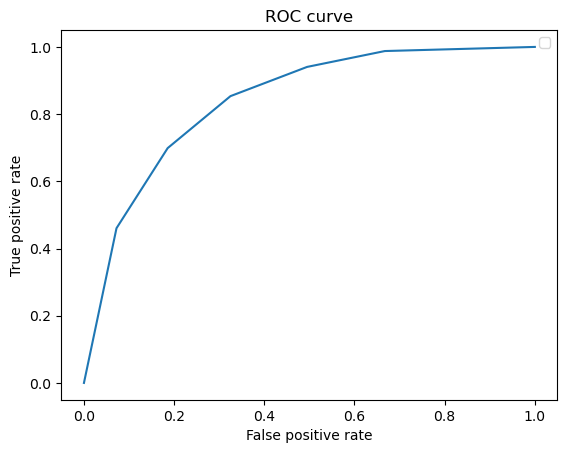

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[10679  4119]
 [  784 14259]]
 ACCURACY SCORE:
0.8357
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.931606      0.775873  0.835696      0.853740      0.853100
recall         0.721652      0.947883  0.835696      0.834767      0.835696
f1-score       0.813297      0.853296  0.835696      0.833297      0.833461
support    14798.000000  15043.000000  0.835696  29841.000000  29841.000000

 MCC = 0.6882453836022019

 specificity =  0.7216515745370996

 Cohen Kappa =  0.6707653305432604

 F1 Score =  0.85329583196194

 Precision =  0.7758733268037872

 Recall =  0.9478827361563518

 10 fold cv =  0.7467009342961455

 5 fold cv =  0.7377869989135108
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[3912 2433]
 [ 724 5721]]
 ACCURACY SCORE:
0.7532
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8237198064974834


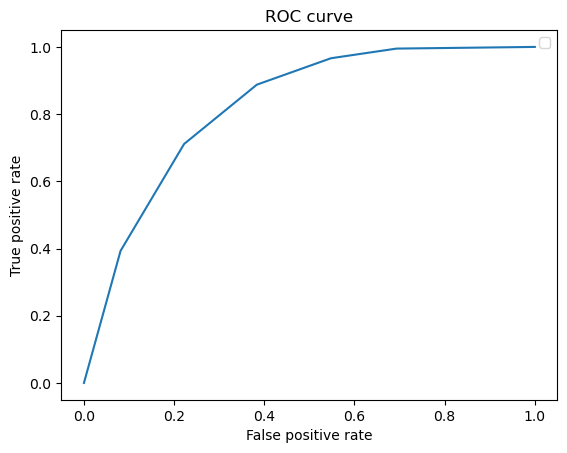

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[10848  4034]
 [ 1595 12733]]
 ACCURACY SCORE:
0.8073
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.871815      0.759408  0.807292      0.815612      0.816678
recall         0.728934      0.888680  0.807292      0.808807      0.807292
f1-score       0.793998      0.818974  0.807292      0.806486      0.806249
support    14882.000000  14328.000000  0.807292  29210.000000  29210.000000

 MCC = 0.6243817336959371

 specificity =  0.7289342830264749

 Cohen Kappa =  0.6156631036299922

 F1 Score =  0.8189741115935038

 Precision =  0.75940836166279

 Recall =  0.888679508654383

 10 fold cv =  0.7101027045532351

 5 fold cv =  0.702584731256419
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[3976 2285]
 [1221 5037]]
 ACCURACY SCORE:
0.7199
 CLASSIFICATION REPORT:
                     0            1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.7808465346436102


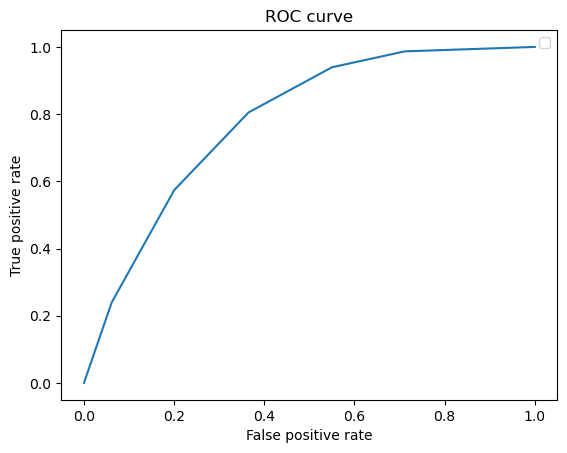

In [51]:
knn=KNeighborsClassifier()
knn.fit(x_tr, y_tr)
evaluate(knn, x_tr, x_te, y_tr, y_te)
knn.fit(x_trains1, y_trains1)
evaluate(knn, x_trains1, x_tests1, y_trains1, y_tests1)
knn.fit(x_trains2, y_trains2)
evaluate(knn, x_trains2, x_tests2, y_trains2, y_tests2)
knn.fit(x_traina1, y_traina1)
evaluate(knn, x_traina1, x_testa1, y_traina1, y_testa1)
knn.fit(x_traina2, y_traina2)
evaluate(knn, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[ 4761 10041]
 [  651  3447]]
 ACCURACY SCORE:
0.4343
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.879712     0.255560  0.434286      0.567636      0.744380
recall         0.321646     0.841142  0.434286      0.581394      0.434286
f1-score       0.471060     0.392016  0.434286      0.431538      0.453921
support    14802.000000  4098.000000  0.434286  18900.000000  18900.000000

 MCC = 0.14839361303958415

 specificity =  0.3216457235508715

 Cohen Kappa =  0.08902831959456547

 F1 Score =  0.3920163766632549

 Precision =  0.2555604982206406

 Recall =  0.8411420204978038

 10 fold cv =  0.43429629629629624

 5 fold cv =  0.4343915343915344
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[2111 4230]
 [ 263 1496]]
 ACCURACY SCORE:
0.4453
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.4327530864197531

 RoC AUC Score::  0.6921419919042975


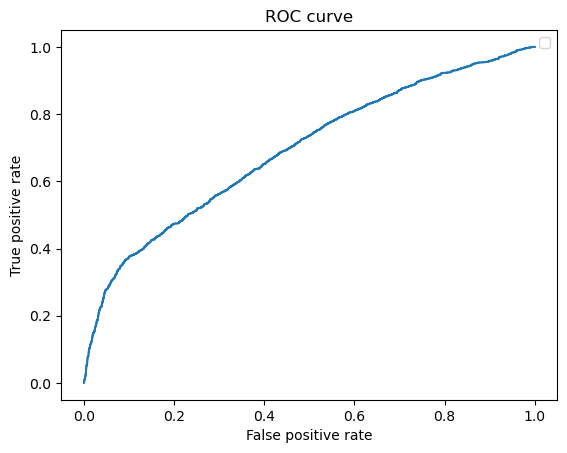

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[ 2622 12274]
 [  994 13710]]
 ACCURACY SCORE:
0.5518
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.725111      0.527632  0.551757      0.626372      0.627012
recall         0.176020      0.932399  0.551757      0.554210      0.551757
f1-score       0.283276      0.673909  0.551757      0.478592      0.477325
support    14896.000000  14704.000000  0.551757  29600.000000  29600.000000

 MCC = 0.1655365069840817

 specificity =  0.1760204081632653

 Cohen Kappa =  0.10788636910791682

 F1 Score =  0.6739087691702713

 Precision =  0.5276323891625616

 Recall =  0.9323993471164309

 10 fold cv =  0.5517060810810811

 5 fold cv =  0.551695945945946
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[1129 5118]
 [ 417 6022]]
 ACCURACY SCORE:
0.5637
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.5625180271306958

 RoC AUC Score::  0.6865688075702646


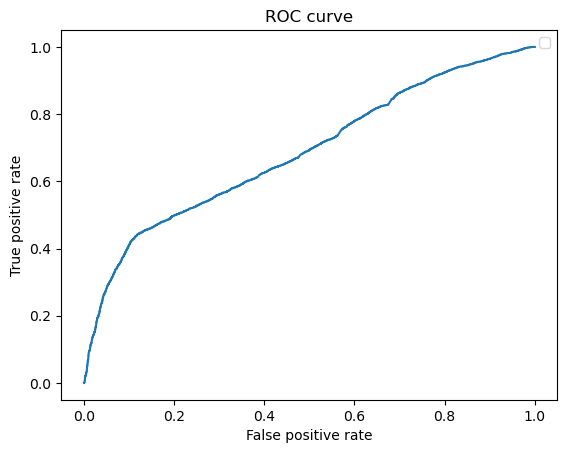

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[ 3473 11423]
 [ 1425 13279]]
 ACCURACY SCORE:
0.5659
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.709065      0.537568  0.565946      0.623316      0.623873
recall         0.233150      0.903088  0.565946      0.568119      0.565946
f1-score       0.350914      0.673958  0.565946      0.512436      0.511389
support    14896.000000  14704.000000  0.565946  29600.000000  29600.000000

 MCC = 0.183304693533717

 specificity =  0.2331498388829216

 Cohen Kappa =  0.13564303695314395

 F1 Score =  0.6739582804649039

 Precision =  0.5375678082746337

 Recall =  0.9030875952121872

 10 fold cv =  0.5657972972972973

 5 fold cv =  0.5659932432432433
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[1474 4773]
 [ 589 5850]]
 ACCURACY SCORE:
0.5773
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.5800885305671492

 RoC AUC Score::  0.6969792091289391


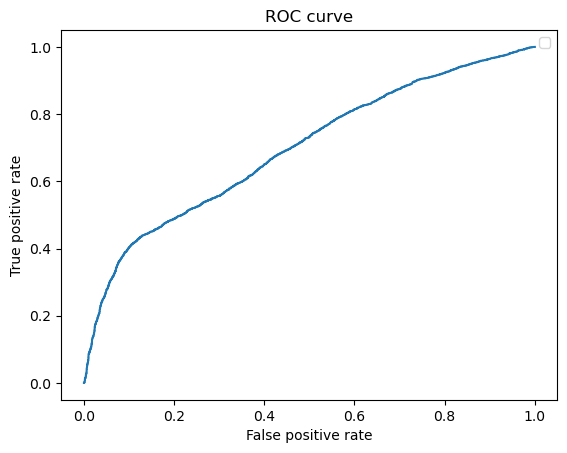

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[ 3162 11636]
 [ 1550 13493]]
 ACCURACY SCORE:
0.5581
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.671053      0.536949  0.558125      0.604001      0.603450
recall         0.213678      0.896962  0.558125      0.555320      0.558125
f1-score       0.324141      0.671761  0.558125      0.497951      0.499378
support    14798.000000  15043.000000  0.558125  29841.000000  29841.000000

 MCC = 0.15170118010600964

 specificity =  0.21367752398972834

 Cohen Kappa =  0.1112570778819909

 F1 Score =  0.6717614258687642

 Precision =  0.5369493413983843

 Recall =  0.8969620421458485

 10 fold cv =  0.557990713172655

 5 fold cv =  0.5579672050006356
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[1330 5015]
 [ 624 5821]]
 ACCURACY SCORE:
0.5591
 CLASSIFICATION REPORT:
                     0         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.5645895230648944

 RoC AUC Score::  0.6622526304592231


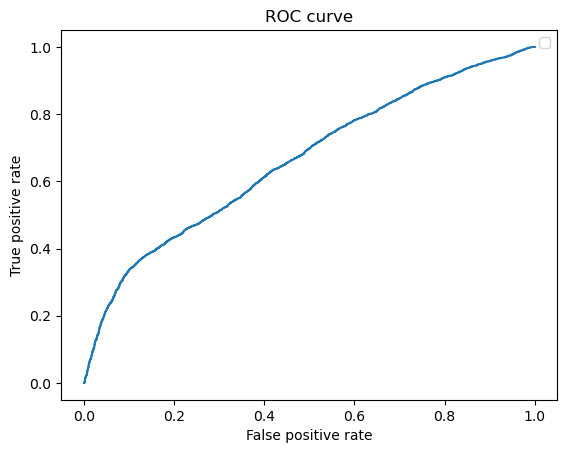

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[ 2435 12447]
 [ 1056 13272]]
 ACCURACY SCORE:
0.5377
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.697508      0.516039  0.537727      0.606773      0.608494
recall         0.163620      0.926298  0.537727      0.544959      0.537727
f1-score       0.265063      0.662821  0.537727      0.463942      0.460170
support    14882.000000  14328.000000  0.537727  29210.000000  29210.000000

 MCC = 0.13857063134130337

 specificity =  0.1636204811181293

 Cohen Kappa =  0.08860745050330587

 F1 Score =  0.6628211851074988

 Precision =  0.5160387262335239

 Recall =  0.9262981574539364

 10 fold cv =  0.5377610407394728

 5 fold cv =  0.5376720301266689
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[1068 5193]
 [ 465 5793]]
 ACCURACY SCORE:
0.5480
 CLASSIFICATION REPORT:
                     0        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.5481666696449883

 RoC AUC Score::  0.6483447936361948


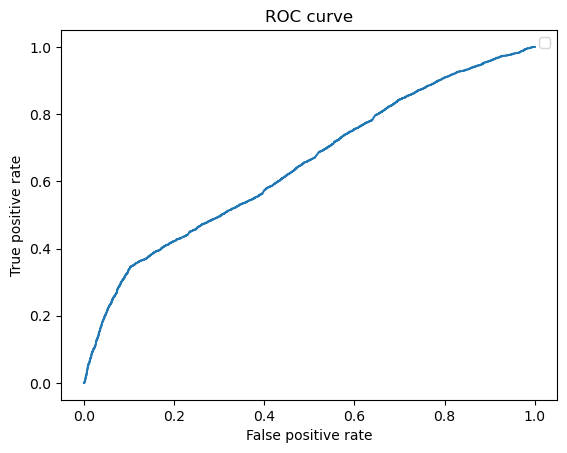

In [52]:
gnb=GaussianNB()
gnb.fit(x_tr, y_tr)
evaluate(gnb, x_tr, x_te, y_tr, y_te)
gnb.fit(x_trains1, y_trains1)
evaluate(gnb, x_trains1, x_tests1, y_trains1, y_tests1)
gnb.fit(x_trains2, y_trains2)
evaluate(gnb, x_trains2, x_tests2, y_trains2, y_tests2)
gnb.fit(x_traina1, y_traina1)
evaluate(gnb, x_traina1, x_testa1, y_traina1, y_testa1)
gnb.fit(x_traina2, y_traina2)
evaluate(gnb, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14802     0]
 [    6  4092]]
 ACCURACY SCORE:
0.9997
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999595     1.000000  0.999683      0.999797      0.999683
recall         1.000000     0.998536  0.999683      0.999268      0.999683
f1-score       0.999797     0.999267  0.999683      0.999532      0.999682
support    14802.000000  4098.000000  0.999683  18900.000000  18900.000000

 MCC = 0.9990652020844278

 specificity =  1.0

 Cohen Kappa =  0.9990647651610475

 F1 Score =  0.9992673992673992

 Precision =  1.0

 Recall =  0.9985358711566618

 10 fold cv =  0.713941798941799

 5 fold cv =  0.7127883597883597
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5066 1275]
 [1086  673]]
 ACCURACY SCORE:
0.7085
 CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7165308641975308

 RoC AUC Score::  0.5909440972639057


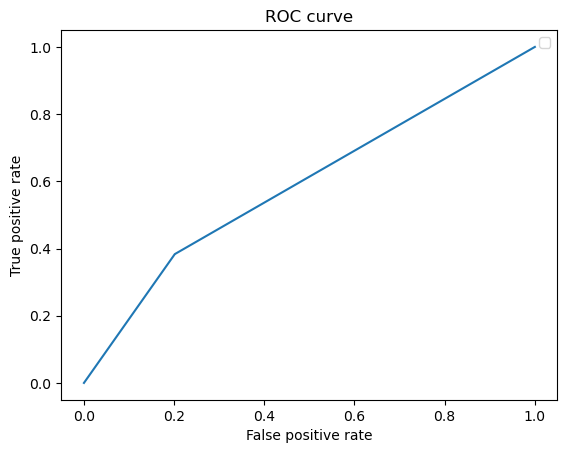

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14511   385]
 [   29 14675]]
 ACCURACY SCORE:
0.9860
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998006      0.974436  0.986014      0.986221      0.986297
recall         0.974154      0.998028  0.986014      0.986091      0.986014
f1-score       0.985936      0.986091  0.986014      0.986013      0.986013
support    14896.000000  14704.000000  0.986014  29600.000000  29600.000000

 MCC = 0.9723114793234728

 specificity =  0.9741541353383458

 Cohen Kappa =  0.9720302142341706

 F1 Score =  0.9860905792232229

 Precision =  0.9744355909694555

 Recall =  0.9980277475516867

 10 fold cv =  0.7060675675675675

 5 fold cv =  0.701875
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4385 1862]
 [1694 4745]]
 ACCURACY SCORE:
0.7197
 CLASSIFICATION REPORT:
                     0            1  accur

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6739949053457219

 RoC AUC Score::  0.7214832835555446


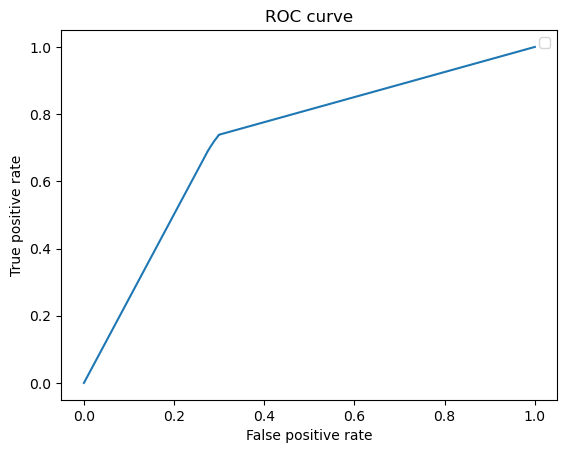

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14734   162]
 [  101 14603]]
 ACCURACY SCORE:
0.9911
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.993192      0.989028  0.991115      0.991110      0.991123
recall         0.989125      0.993131  0.991115      0.991128      0.991115
f1-score       0.991154      0.991075  0.991115      0.991115      0.991115
support    14896.000000  14704.000000  0.991115  29600.000000  29600.000000

 MCC = 0.9822378004393337

 specificity =  0.989124597207304

 Cohen Kappa =  0.9822294571355733

 F1 Score =  0.9910753673351658

 Precision =  0.9890281070098205

 Recall =  0.9931311207834603

 10 fold cv =  0.7299594594594596

 5 fold cv =  0.7251925675675674
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4499 1748]
 [1502 4937]]
 ACCURACY SCORE:
0.7438
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.693323210495696

 RoC AUC Score::  0.7464474141872925


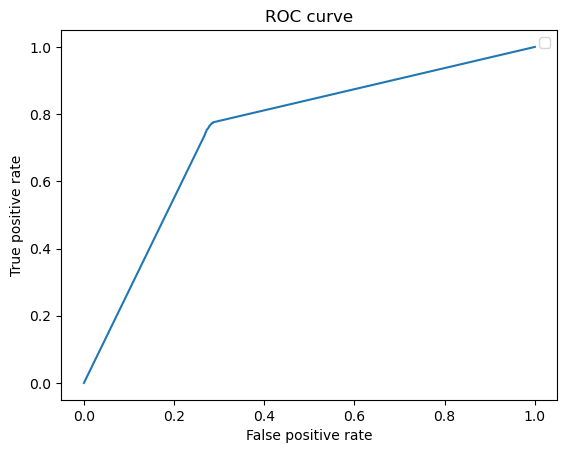

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14620   178]
 [   80 14963]]
 ACCURACY SCORE:
0.9914
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.994558      0.988244  0.991354      0.991401      0.991375
recall         0.987971      0.994682  0.991354      0.991327      0.991354
f1-score       0.991254      0.991452  0.991354      0.991353      0.991354
support    14798.000000  15043.000000  0.991354  29841.000000  29841.000000

 MCC = 0.9827274590421767

 specificity =  0.9879713474793891

 Cohen Kappa =  0.9827062559806954

 F1 Score =  0.9914524251258945

 Precision =  0.9882438412258107

 Recall =  0.994681911852689

 10 fold cv =  0.7190039978713945

 5 fold cv =  0.7132837909853278
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4461 1884]
 [1586 4859]]
 ACCURACY SCORE:
0.7287
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6709304143862392

 RoC AUC Score::  0.7325326931341819


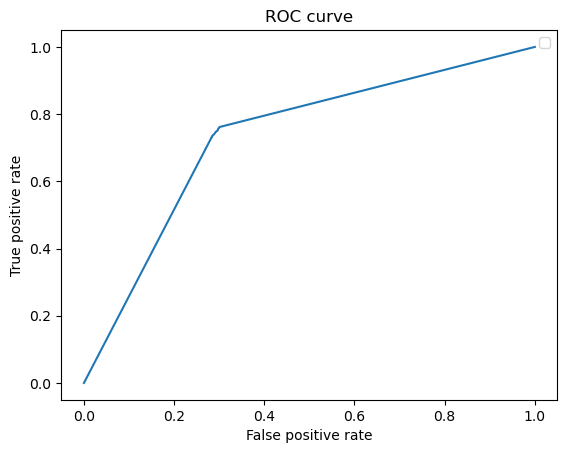

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14496   386]
 [   22 14306]]
 ACCURACY SCORE:
0.9860
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998485      0.973727  0.986032      0.986106      0.986341
recall         0.974063      0.998465  0.986032      0.986264      0.986032
f1-score       0.986122      0.985941  0.986032      0.986032      0.986033
support    14882.000000  14328.000000  0.986032  29210.000000  29210.000000

 MCC = 0.9723694918029682

 specificity =  0.9740626259911302

 Cohen Kappa =  0.9720675172907133

 F1 Score =  0.9859407305306684

 Precision =  0.9737271984753607

 Recall =  0.998464544946957

 10 fold cv =  0.681516603902773

 5 fold cv =  0.6755186579938378
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4265 1996]
 [1839 4419]]
 ACCURACY SCORE:
0.6937
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6496922478967729

 RoC AUC Score::  0.69432776900064


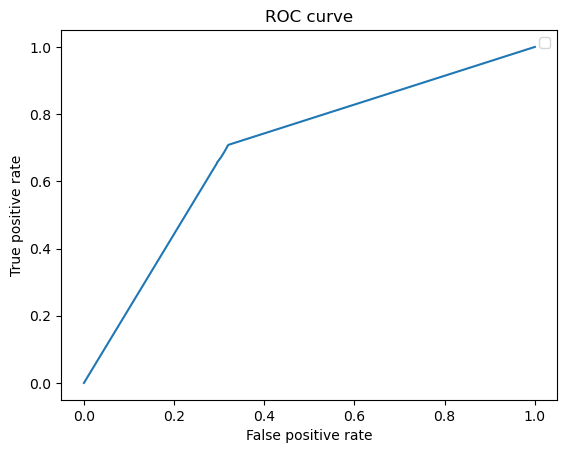

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_tr, y_tr)
evaluate(decision_tree, x_tr, x_te, y_tr, y_te)
decision_tree.fit(x_trains1, y_trains1)
evaluate(decision_tree, x_trains1, x_tests1, y_trains1, y_tests1)
decision_tree.fit(x_trains2, y_trains2)
evaluate(decision_tree, x_trains2, x_tests2, y_trains2, y_tests2)
decision_tree.fit(x_traina1, y_traina1)
evaluate(decision_tree, x_traina1, x_testa1, y_traina1, y_testa1)
decision_tree.fit(x_traina2, y_traina2)
evaluate(decision_tree, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14801     1]
 [    5  4093]]
 ACCURACY SCORE:
0.9997
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999662     0.999756  0.999683      0.999709      0.999683
recall         0.999932     0.998780  0.999683      0.999356      0.999683
f1-score       0.999797     0.999268  0.999683      0.999532      0.999682
support    14802.000000  4098.000000  0.999683  18900.000000  18900.000000

 MCC = 0.99906512437327

 specificity =  0.999932441561951

 Cohen Kappa =  0.9990649302536918

 F1 Score =  0.9992675781249999

 Precision =  0.9997557401074744

 Recall =  0.9987798926305514

 10 fold cv =  0.8019365079365081

 5 fold cv =  0.8010899470899472
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[6024  317]
 [1276  483]]
 ACCURACY SCORE:
0.8033
 CLASSIFICATION REPORT:
                     0            1  acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8026296296296297

 RoC AUC Score::  0.7476780374506704


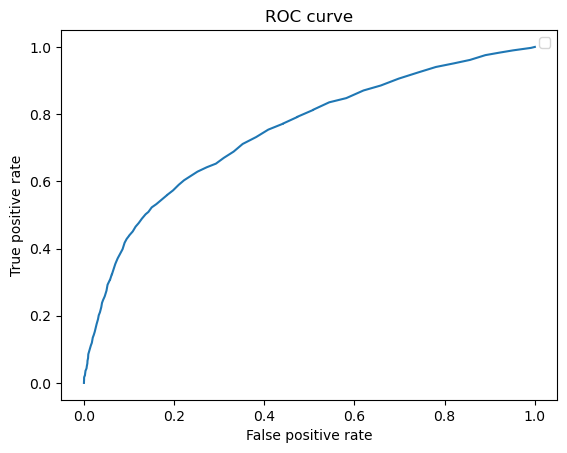

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14503   393]
 [   22 14682]]
 ACCURACY SCORE:
0.9860
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998485      0.973930   0.98598      0.986208      0.986287
recall         0.973617      0.998504   0.98598      0.986060      0.985980
f1-score       0.985894      0.986064   0.98598      0.985979      0.985979
support    14896.000000  14704.000000   0.98598  29600.000000  29600.000000

 MCC = 0.9722682914284557

 specificity =  0.9736170784103115

 Cohen Kappa =  0.9719628386644414

 F1 Score =  0.9860640048356225

 Precision =  0.9739303482587065

 Recall =  0.9985038084874864

 10 fold cv =  0.7801385135135136

 5 fold cv =  0.7746148648648647
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4894 1353]
 [1341 5098]]
 ACCURACY SCORE:
0.7876
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8633688136760064


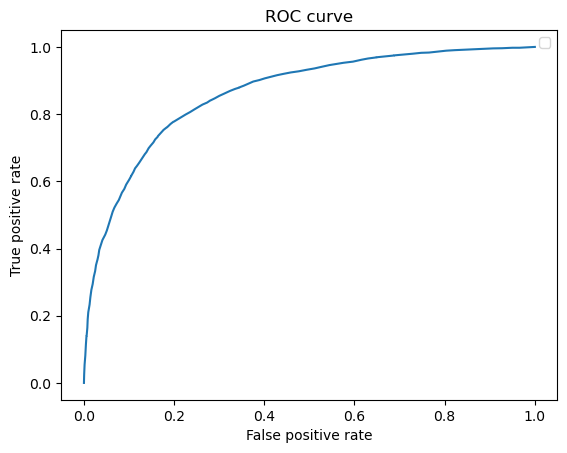

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14725   171]
 [   92 14612]]
 ACCURACY SCORE:
0.9911
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.993791      0.988433  0.991115      0.991112      0.991129
recall         0.988520      0.993743  0.991115      0.991132      0.991115
f1-score       0.991149      0.991081  0.991115      0.991115      0.991115
support    14896.000000  14704.000000  0.991115  29600.000000  29600.000000

 MCC = 0.9822435909301359

 specificity =  0.9885204081632653

 Cohen Kappa =  0.9822295973278983

 F1 Score =  0.9910808152745278

 Precision =  0.9884326591354935

 Recall =  0.9937431991294886

 10 fold cv =  0.8152027027027028

 5 fold cv =  0.8090304054054053
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5187 1060]
 [1177 5262]]
 ACCURACY SCORE:
0.8237
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.9009475534434505


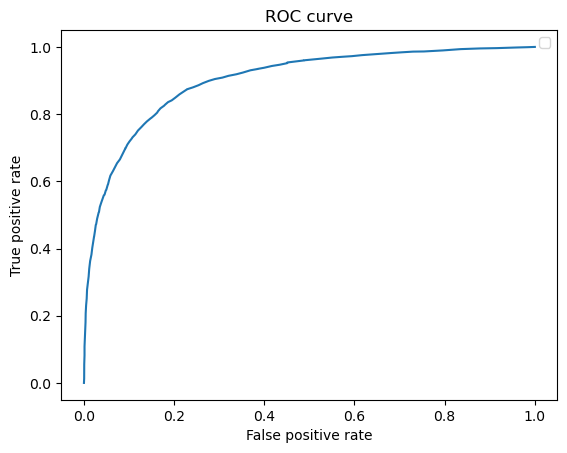

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14614   184]
 [   74 14969]]
 ACCURACY SCORE:
0.9914
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.994962      0.987857  0.991354      0.991410      0.991380
recall         0.987566      0.995081  0.991354      0.991323      0.991354
f1-score       0.991250      0.991456  0.991354      0.991353      0.991354
support    14798.000000  15043.000000  0.991354  29841.000000  29841.000000

 MCC = 0.9827328559089192

 specificity =  0.9875658872820652

 Cohen Kappa =  0.9827061417730514

 F1 Score =  0.991455821963174

 Precision =  0.9878571899953804

 Recall =  0.9950807684637373

 10 fold cv =  0.8109614774048975

 5 fold cv =  0.8038269615309125
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5128 1217]
 [1114 5331]]
 ACCURACY SCORE:
0.8177
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.893467266517132


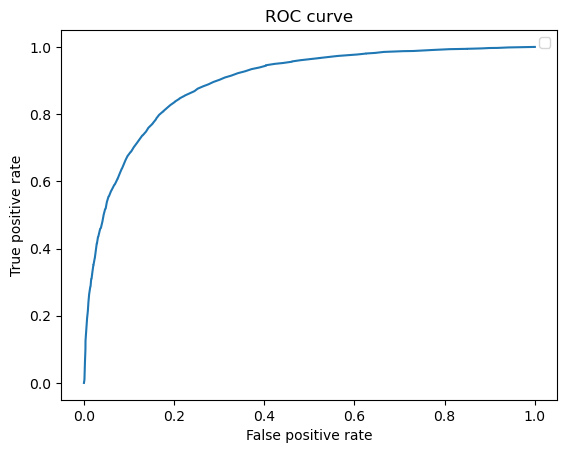

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14489   393]
 [   15 14313]]
 ACCURACY SCORE:
0.9860
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998966      0.973276  0.986032      0.986121      0.986365
recall         0.973592      0.998953  0.986032      0.986273      0.986032
f1-score       0.986116      0.985948  0.986032      0.986032      0.986033
support    14882.000000  14328.000000  0.986032  29210.000000  29210.000000

 MCC = 0.9723936753014161

 specificity =  0.9735922591049591

 Cohen Kappa =  0.972068025049284

 F1 Score =  0.9859475098160777

 Precision =  0.9732762137902897

 Recall =  0.9989530988274706

 10 fold cv =  0.758610065046217

 5 fold cv =  0.7531290653885655
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4731 1530]
 [1309 4949]]
 ACCURACY SCORE:
0.7732
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8420625400796675


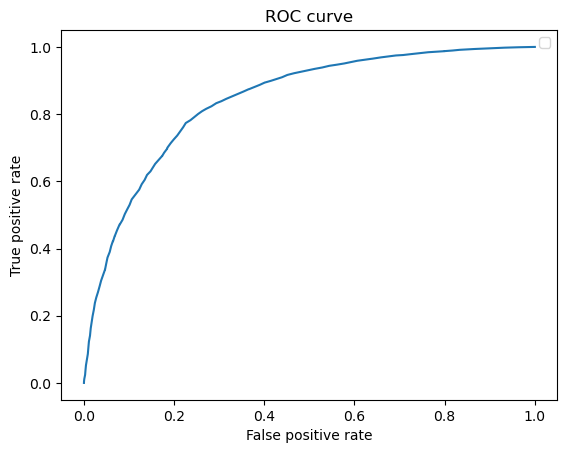

In [54]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=100)
rf_clf.fit(x_tr, y_tr)
evaluate(rf_clf, x_tr, x_te, y_tr, y_te)
rf_clf.fit(x_trains1, y_trains1)
evaluate(rf_clf, x_trains1, x_tests1, y_trains1, y_tests1)
rf_clf.fit(x_trains2, y_trains2)
evaluate(rf_clf, x_trains2, x_tests2, y_trains2, y_tests2)
rf_clf.fit(x_traina1, y_traina1)
evaluate(rf_clf, x_traina1, x_testa1, y_traina1, y_testa1)
rf_clf.fit(x_traina2, y_traina2)
evaluate(rf_clf, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14068   734]
 [ 2902  1196]]
 ACCURACY SCORE:
0.8076
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.828992     0.619689  0.807619      0.724341      0.783610
recall         0.950412     0.291850  0.807619      0.621131      0.807619
f1-score       0.885560     0.396815  0.807619      0.641187      0.779587
support    14802.000000  4098.000000  0.807619  18900.000000  18900.000000

 MCC = 0.3296943629477907

 specificity =  0.9504121064720984

 Cohen Kappa =  0.2995642075316387

 F1 Score =  0.39681486396814863

 Precision =  0.6196891191709845

 Recall =  0.29184968277208395

 10 fold cv =  0.8049629629629629

 5 fold cv =  0.804058201058201
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[6041  300]
 [1283  476]]
 ACCURACY SCORE:
0.8046
 CLASSIFICATION REPORT:
                     0            1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.801148148148148

 RoC AUC Score::  0.7557411053559323


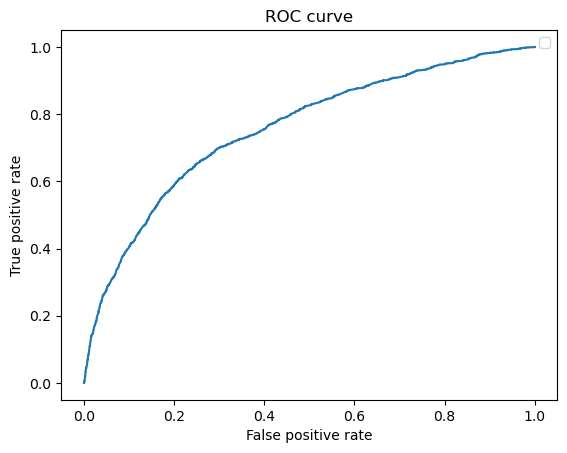

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11436  3460]
 [ 5370  9334]]
 ACCURACY SCORE:
0.7017
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.680471      0.729561  0.701689      0.705016      0.704857
recall         0.767723      0.634793  0.701689      0.701258      0.701689
f1-score       0.721469      0.678886  0.701689      0.700177      0.700315
support    14896.000000  14704.000000  0.701689  29600.000000  29600.000000

 MCC = 0.4062566816987032

 specificity =  0.7677228786251342

 Cohen Kappa =  0.402853377885773

 F1 Score =  0.6788857371445196

 Precision =  0.7295607315929342

 Recall =  0.6347932535364527

 10 fold cv =  0.699912162162162

 5 fold cv =  0.7003513513513515
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4780 1467]
 [2283 4156]]
 ACCURACY SCORE:
0.7044
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7010722660029514

 RoC AUC Score::  0.7735590828589181


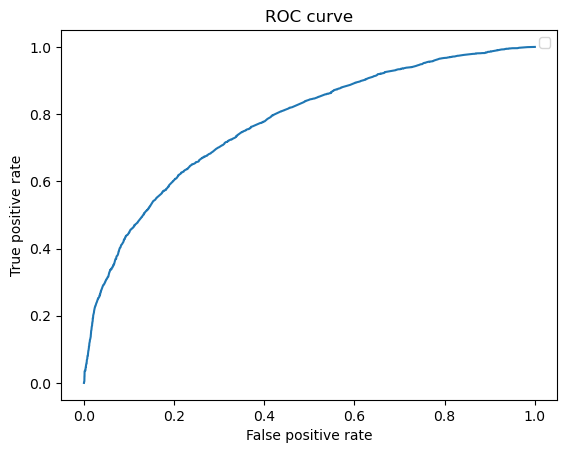

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11315  3581]
 [ 5016  9688]]
 ACCURACY SCORE:
0.7096
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.692854      0.730123  0.709561      0.711488      0.711368
recall         0.759600      0.658868  0.709561      0.709234      0.709561
f1-score       0.724693      0.692668  0.709561      0.708681      0.708785
support    14896.000000  14704.000000  0.709561  29600.000000  29600.000000

 MCC = 0.42071653606937454

 specificity =  0.7595998925886144

 Cohen Kappa =  0.4187315900939812

 F1 Score =  0.6926679297894398

 Precision =  0.7301228427161052

 Recall =  0.6588683351468988

 10 fold cv =  0.7056452702702702

 5 fold cv =  0.7053851351351352
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4715 1532]
 [2197 4242]]
 ACCURACY SCORE:
0.7061
 CLASSIFICATION REPORT:
                     0         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7033032381587805

 RoC AUC Score::  0.7817284832827849


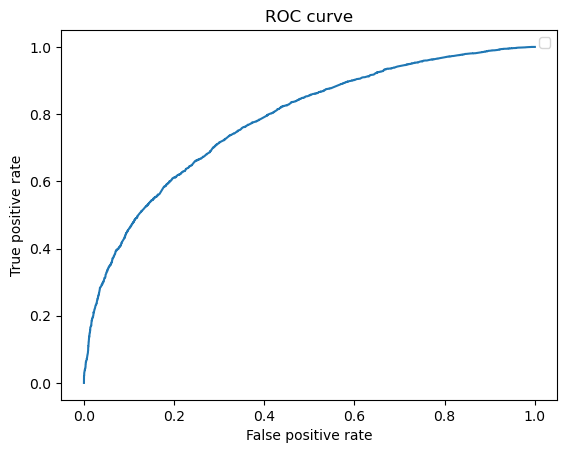

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[10514  4284]
 [ 5308  9735]]
 ACCURACY SCORE:
0.6786
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.664518      0.694415  0.678563      0.679466      0.679589
recall         0.710501      0.647145  0.678563      0.678823      0.678563
f1-score       0.686741      0.669947  0.678563      0.678344      0.678275
support    14798.000000  15043.000000  0.678563  29841.000000  29841.000000

 MCC = 0.3582887995793515

 specificity =  0.7105014191106906

 Cohen Kappa =  0.35744484820965405

 F1 Score =  0.6699470098410295

 Precision =  0.6944147228760967

 Recall =  0.6471448514259124

 10 fold cv =  0.6739955867361832

 5 fold cv =  0.6745618419699277
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4531 1814]
 [2285 4160]]
 ACCURACY SCORE:
0.6795
 CLASSIFICATION REPORT:
                     0         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6753010164190775

 RoC AUC Score::  0.7495360329049648


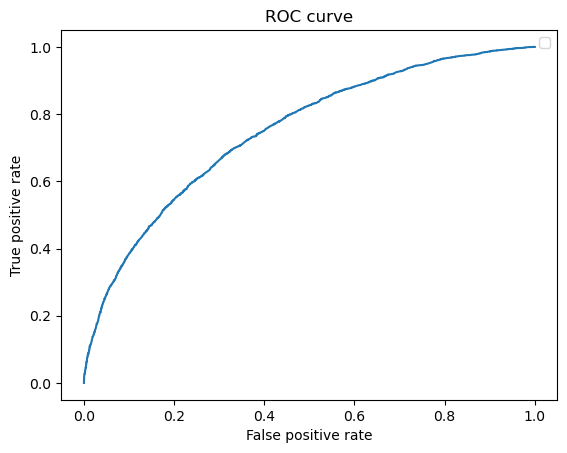

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11123  3759]
 [ 6168  8160]]
 ACCURACY SCORE:
0.6602
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.643283      0.684621  0.660151      0.663952      0.663560
recall         0.747413      0.569514  0.660151      0.658464      0.660151
f1-score       0.691449      0.621785  0.660151      0.656617      0.657278
support    14882.000000  14328.000000  0.660151  29210.000000  29210.000000

 MCC = 0.32236880723862

 specificity =  0.7474129821260583

 Cohen Kappa =  0.3179221452857687

 F1 Score =  0.6217853468967882

 Precision =  0.6846211930531085

 Recall =  0.5695142378559463

 10 fold cv =  0.6583738445737761

 5 fold cv =  0.6584183498801781
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4663 1598]
 [2659 3599]]
 ACCURACY SCORE:
0.6600
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6630241665273238

 RoC AUC Score::  0.7243814134167649


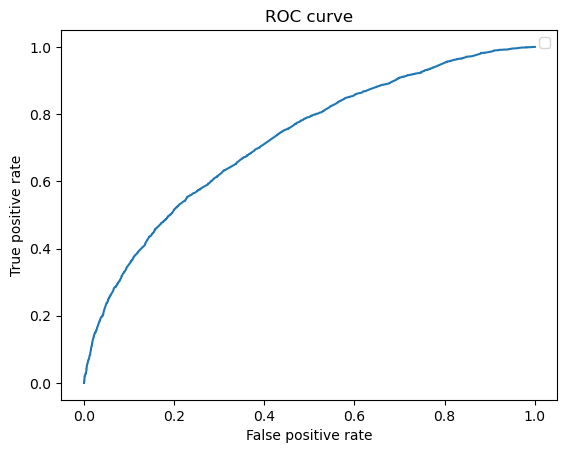

In [54]:
ada_boost_clf = AdaBoostClassifier(n_estimators=50)
ada_boost_clf.fit(x_tr, y_tr)
evaluate(ada_boost_clf, x_tr, x_te, y_tr, y_te)
ada_boost_clf.fit(x_trains1, y_trains1)
evaluate(ada_boost_clf, x_trains1, x_tests1, y_trains1, y_tests1)
ada_boost_clf.fit(x_trains2, y_trains2)
evaluate(ada_boost_clf, x_trains2, x_tests2, y_trains2, y_tests2)
ada_boost_clf.fit(x_traina1, y_traina1)
evaluate(ada_boost_clf, x_traina1, x_testa1, y_traina1, y_testa1)
ada_boost_clf.fit(x_traina2, y_traina2)
evaluate(ada_boost_clf, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14505   297]
 [ 1898  2200]]
 ACCURACY SCORE:
0.8839
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.884289     0.881057  0.883862      0.882673      0.883589
recall         0.979935     0.536847  0.883862      0.758391      0.883862
f1-score       0.929659     0.667172  0.883862      0.798415      0.872745
support    14802.000000  4098.000000  0.883862  18900.000000  18900.000000

 MCC = 0.6289019864383314

 specificity =  0.979935143899473

 Cohen Kappa =  0.601790507222455

 F1 Score =  0.6671721000758151

 Precision =  0.8810572687224669

 Recall =  0.5368472425573451

 10 fold cv =  0.7980264550264551

 5 fold cv =  0.7973439153439154
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5970  371]
 [1260  499]]
 ACCURACY SCORE:
0.7986
 CLASSIFICATION REPORT:
                     0            1  ac

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7948518518518519

 RoC AUC Score::  0.7478322447226372


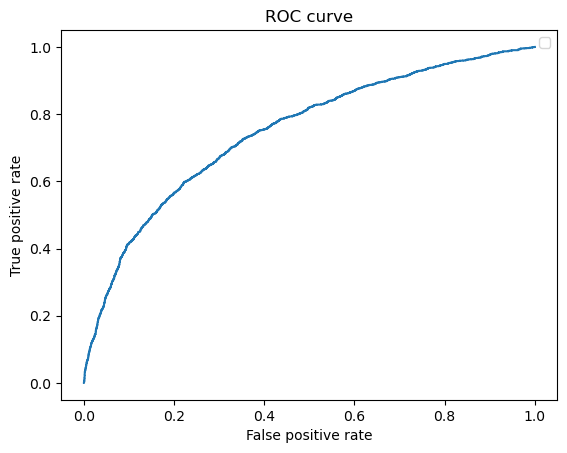

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[12242  2654]
 [ 2887 11817]]
 ACCURACY SCORE:
0.8128
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.809174      0.816599  0.812804      0.812887      0.812862
recall         0.821831      0.803659  0.812804      0.812745      0.812804
f1-score       0.815454      0.810077  0.812804      0.812765      0.812783
support    14896.000000  14704.000000  0.812804  29600.000000  29600.000000

 MCC = 0.625631674177042

 specificity =  0.8218313641245972

 Cohen Kappa =  0.6255541156920654

 F1 Score =  0.8100771208226222

 Precision =  0.8165987146707208

 Recall =  0.8036588683351469

 10 fold cv =  0.7406722972972973

 5 fold cv =  0.7393783783783783
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4751 1496]
 [1706 4733]]
 ACCURACY SCORE:
0.7476
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7231676064225817

 RoC AUC Score::  0.8281516733871674


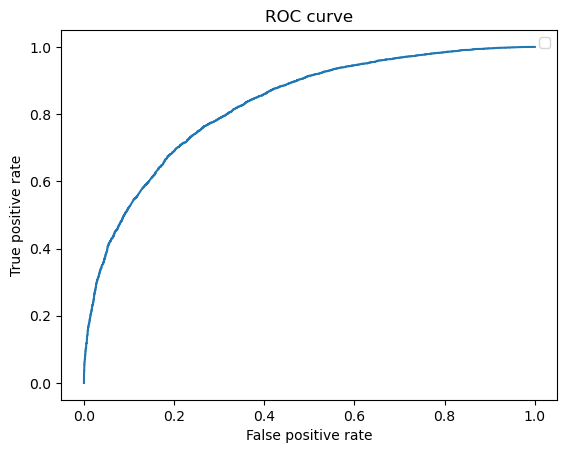

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[13218  1678]
 [ 2186 12518]]
 ACCURACY SCORE:
0.8695
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.858089      0.881798  0.869459      0.869943      0.869866
recall         0.887352      0.851333  0.869459      0.869343      0.869459
f1-score       0.872475      0.866298  0.869459      0.869386      0.869406
support    14896.000000  14704.000000  0.869459  29600.000000  29600.000000

 MCC = 0.7392856448058058

 specificity =  0.8873523093447906

 Cohen Kappa =  0.738849787555157

 F1 Score =  0.8662975778546713

 Precision =  0.8817976894899971

 Recall =  0.8513329706202394

 10 fold cv =  0.8045574324324325

 5 fold cv =  0.8018749999999999
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5165 1082]
 [1356 5083]]
 ACCURACY SCORE:
0.8078
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7807899167964247

 RoC AUC Score::  0.8903465214786247


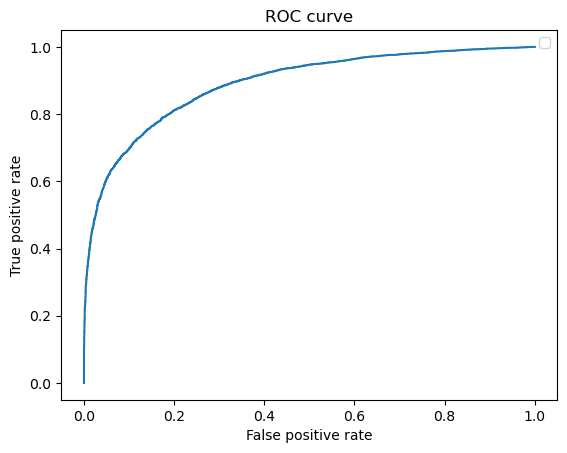

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[12880  1918]
 [ 1987 13056]]
 ACCURACY SCORE:
0.8691
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.866348      0.871911   0.86914      0.869130      0.869153
recall         0.870388      0.867912   0.86914      0.869150      0.869140
f1-score       0.868363      0.869907   0.86914      0.869135      0.869142
support    14798.000000  15043.000000   0.86914  29841.000000  29841.000000

 MCC = 0.7382797382223698

 specificity =  0.8703878902554399

 Cohen Kappa =  0.738271843256184

 F1 Score =  0.8699070526701536

 Precision =  0.8719113129424335

 Recall =  0.867911985641162

 10 fold cv =  0.7984384343522797

 5 fold cv =  0.7966656124785924
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5078 1267]
 [1315 5130]]
 ACCURACY SCORE:
0.7981
 CLASSIFICATION REPORT:
                     0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7720093823299452

 RoC AUC Score::  0.8846487677450158


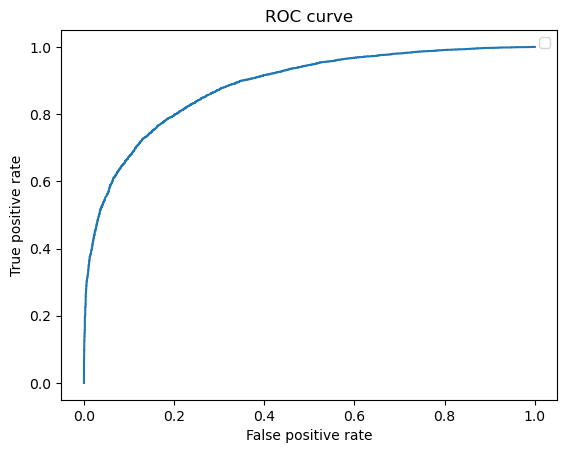

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11742  3140]
 [ 2806 11522]]
 ACCURACY SCORE:
0.7964
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.807121      0.785841   0.79644      0.796481      0.796683
recall         0.789007      0.804160   0.79644      0.796583      0.796440
f1-score       0.797961      0.794895   0.79644      0.796428      0.796457
support    14882.000000  14328.000000   0.79644  29210.000000  29210.000000

 MCC = 0.5930643634078009

 specificity =  0.7890068539174843

 Cohen Kappa =  0.5929092839984944

 F1 Score =  0.7948947913073473

 Precision =  0.7858409493929887

 Recall =  0.8041596873255165

 10 fold cv =  0.7176104073947278

 5 fold cv =  0.7153166723724753
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4591 1670]
 [1736 4522]]
 ACCURACY SCORE:
0.7279
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6969722052386976

 RoC AUC Score::  0.8045453935238251


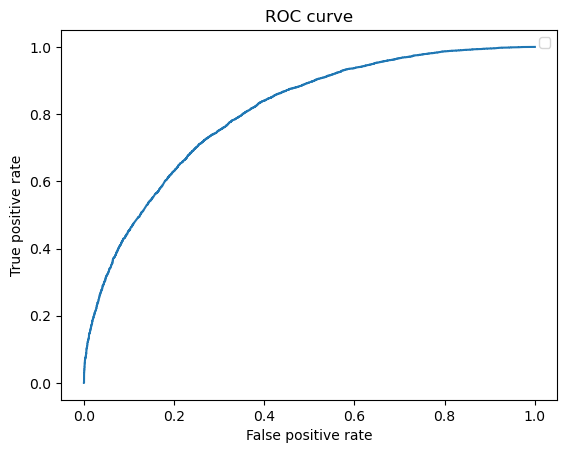

In [56]:
grad_boost_clf = XGBClassifier(n_estimators=100)
grad_boost_clf.fit(x_tr, y_tr)
evaluate(grad_boost_clf, x_tr, x_te, y_tr, y_te)
grad_boost_clf.fit(x_trains1, y_trains1)
evaluate(grad_boost_clf, x_trains1, x_tests1, y_trains1, y_tests1)
grad_boost_clf.fit(x_trains2, y_trains2)
evaluate(grad_boost_clf, x_trains2, x_tests2, y_trains2, y_tests2)
grad_boost_clf.fit(x_traina1, y_traina1)
evaluate(grad_boost_clf, x_traina1, x_testa1, y_traina1, y_testa1)
grad_boost_clf.fit(x_traina2, y_traina2)
evaluate(grad_boost_clf, x_traina2, x_testa2, y_traina2, y_testa2)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14315   487]
 [ 2652  1446]]
 ACCURACY SCORE:
0.8339
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.843697     0.748060  0.833915      0.795878      0.822960
recall         0.967099     0.352855  0.833915      0.659977      0.833915
f1-score       0.901193     0.479522  0.833915      0.690358      0.809764
support    14802.000000  4098.000000  0.833915  18900.000000  18900.000000

 MCC = 0.4351263550928822

 specificity =  0.9670990406701797

 Cohen Kappa =  0.3955036970938497

 F1 Score =  0.4795224672525287

 Precision =  0.7480600103466115

 Recall =  0.3528550512445095

 10 fold cv =  0.8046931216931216

 5 fold cv =  0.8042328042328043
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[6062  279]
 [1267  492]]
 ACCURACY SCORE:
0.8091
 CLASSIFICATION REPORT:
                     0            1  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.803074074074074

 RoC AUC Score::  0.7633903688055185


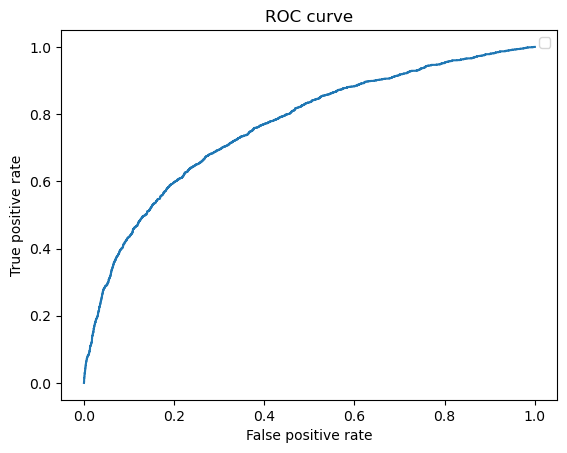

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11773  3123]
 [ 4051 10653]]
 ACCURACY SCORE:
0.7576
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.743996      0.773301  0.757635      0.758649      0.758554
recall         0.790346      0.724497  0.757635      0.757422      0.757635
f1-score       0.766471      0.748104  0.757635      0.757288      0.757347
support    14896.000000  14704.000000  0.757635  29600.000000  29600.000000

 MCC = 0.5160690365485799

 specificity =  0.7903464017185822

 Cohen Kappa =  0.5150526284404044

 F1 Score =  0.7481039325842698

 Precision =  0.773301393728223

 Recall =  0.7244967355821545

 10 fold cv =  0.7316385135135135

 5 fold cv =  0.7303716216216216
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4767 1480]
 [1944 4495]]
 ACCURACY SCORE:
0.7301
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7203770982213439

 RoC AUC Score::  0.8123351297456449


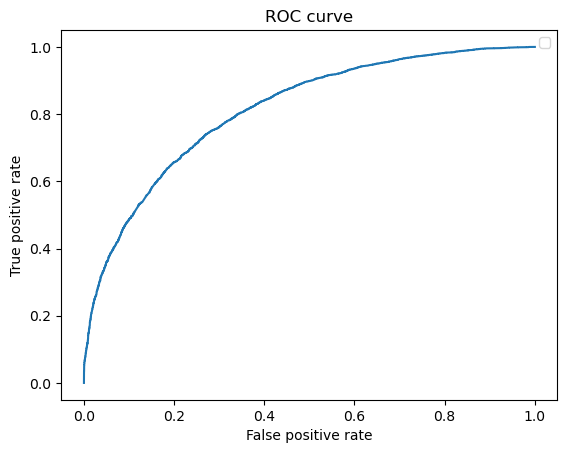

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[12513  2383]
 [ 3084 11620]]
 ACCURACY SCORE:
0.8153
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.802270      0.829822  0.815304      0.816046      0.815957
recall         0.840024      0.790261  0.815304      0.815143      0.815304
f1-score       0.820713      0.809559  0.815304      0.815136      0.815172
support    14896.000000  14704.000000  0.815304  29600.000000  29600.000000

 MCC = 0.631187938288291

 specificity =  0.8400241675617616

 Cohen Kappa =  0.6304790321937144

 F1 Score =  0.8095586442331139

 Precision =  0.8298221809612226

 Recall =  0.7902611534276387

 10 fold cv =  0.7864290540540542

 5 fold cv =  0.7849020270270269
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5075 1172]
 [1523 4916]]
 ACCURACY SCORE:
0.7876
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7648825219687939

 RoC AUC Score::  0.8727697541442037


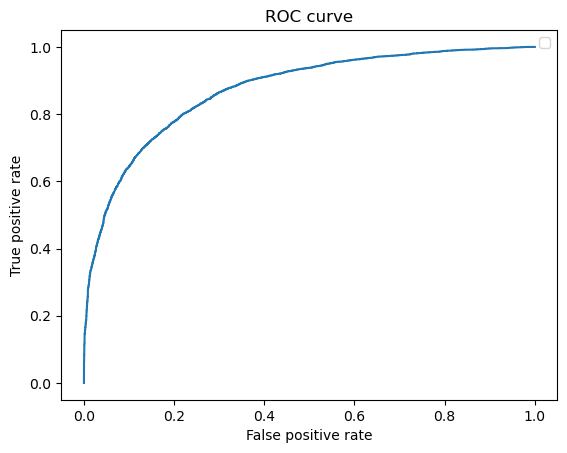

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11867  2931]
 [ 2878 12165]]
 ACCURACY SCORE:
0.8053
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.804815      0.805843  0.805335      0.805329      0.805333
recall         0.801933      0.808682  0.805335      0.805307      0.805335
f1-score       0.803371      0.807260  0.805335      0.805316      0.805331
support    14798.000000  15043.000000  0.805335  29841.000000  29841.000000

 MCC = 0.6106361353213807

 specificity =  0.8019326936072442

 Cohen Kappa =  0.6106322821107922

 F1 Score =  0.8072596967384453

 Precision =  0.8058426073131956

 Recall =  0.8086817789004853

 10 fold cv =  0.7800174532178318

 5 fold cv =  0.7789316832230149
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4921 1424]
 [1386 5059]]
 ACCURACY SCORE:
0.7803
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7574824081313527

 RoC AUC Score::  0.8656960606844238


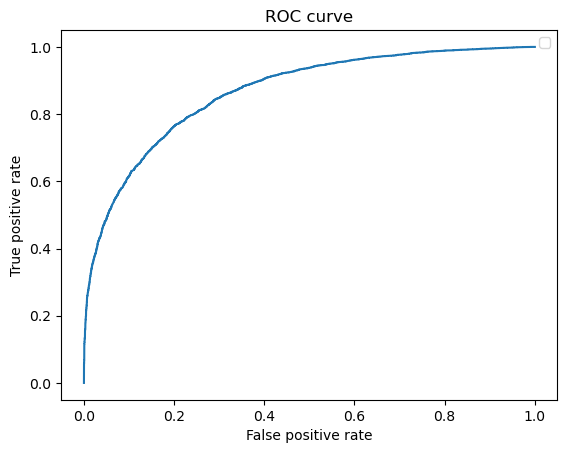

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[11159  3723]
 [ 4018 10310]]
 ACCURACY SCORE:
0.7350
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.735257      0.734697  0.734988      0.734977      0.734982
recall         0.749832      0.719570  0.734988      0.734701      0.734988
f1-score       0.742473      0.727055  0.734988      0.734764      0.734910
support    14882.000000  14328.000000  0.734988  29210.000000  29210.000000

 MCC = 0.4696780027987171

 specificity =  0.7498320118263674

 Cohen Kappa =  0.4695820404361052

 F1 Score =  0.7270547582948415

 Precision =  0.7346967861469393

 Recall =  0.7195700725851479

 10 fold cv =  0.7066689489900717

 5 fold cv =  0.7040979116740843
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4575 1686]
 [1925 4333]]
 ACCURACY SCORE:
0.7116
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6928264485173703

 RoC AUC Score::  0.7875796890856561


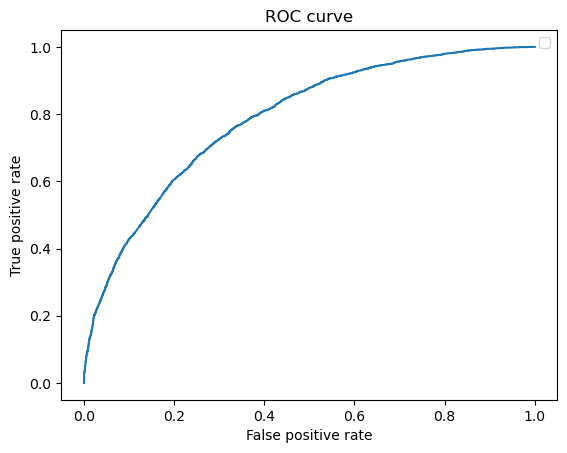

In [57]:
lgbm_clf = lgb.LGBMClassifier()
lgbm_clf.fit(x_tr, y_tr)
evaluate(lgbm_clf, x_tr, x_te, y_tr, y_te)
lgbm_clf.fit(x_trains1, y_trains1)
evaluate(lgbm_clf, x_trains1, x_tests1, y_trains1, y_tests1)
lgbm_clf.fit(x_trains2, y_trains2)
evaluate(lgbm_clf, x_trains2, x_tests2, y_trains2, y_tests2)
lgbm_clf.fit(x_traina1, y_traina1)
evaluate(lgbm_clf, x_traina1, x_testa1, y_traina1, y_testa1)
lgbm_clf.fit(x_traina2, y_traina2)
evaluate(lgbm_clf, x_traina2, x_testa2, y_traina2, y_testa2)my

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14802     0]
 [    6  4092]]
 ACCURACY SCORE:
0.9997
 CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999595     1.000000  0.999683      0.999797      0.999683
recall         1.000000     0.998536  0.999683      0.999268      0.999683
f1-score       0.999797     0.999267  0.999683      0.999532      0.999682
support    14802.000000  4098.000000  0.999683  18900.000000  18900.000000

 MCC = 0.9990652020844278

 specificity =  1.0

 Cohen Kappa =  0.9990647651610475

 F1 Score =  0.9992673992673992

 Precision =  1.0

 Recall =  0.9985358711566618

 10 fold cv =  0.7981957671957671

 5 fold cv =  0.7982539682539683
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[6041  300]
 [1328  431]]
 ACCURACY SCORE:
0.7990
 CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighte

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.7377037855823193


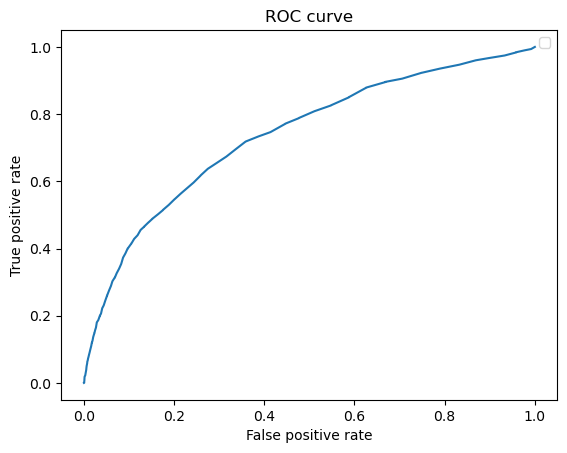

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14508   388]
 [   24 14680]]
 ACCURACY SCORE:
0.9861
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998348      0.974250  0.986081      0.986299      0.986377
recall         0.973953      0.998368  0.986081      0.986160      0.986081
f1-score       0.986000      0.986161  0.986081      0.986081      0.986080
support    14896.000000  14704.000000  0.986081  29600.000000  29600.000000

 MCC = 0.9724595244504487

 specificity =  0.973952738990333

 Cohen Kappa =  0.9721654315548619

 F1 Score =  0.9861614940212279

 Precision =  0.9742500663658084

 Recall =  0.9983677910772579

 10 fold cv =  0.7929290540540539

 5 fold cv =  0.7878378378378378
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4908 1339]
 [1193 5246]]
 ACCURACY SCORE:
0.8004
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8704913876598336


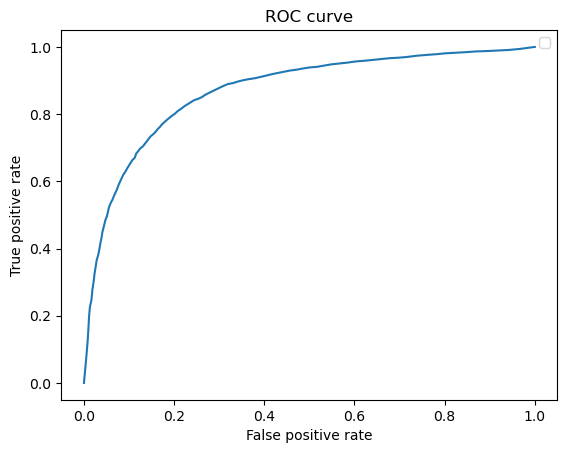

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14729   167]
 [   96 14608]]
 ACCURACY SCORE:
0.9911
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.993524      0.988697  0.991115      0.991111      0.991126
recall         0.988789      0.993471  0.991115      0.991130      0.991115
f1-score       0.991151      0.991078  0.991115      0.991115      0.991115
support    14896.000000  14704.000000  0.991115  29600.000000  29600.000000

 MCC = 0.9822408380086513

 specificity =  0.9887889366272825

 Cohen Kappa =  0.9822295350204714

 F1 Score =  0.9910783947895113

 Precision =  0.9886971235194586

 Recall =  0.9934711643090316

 10 fold cv =  0.8442398648648648

 5 fold cv =  0.8367871621621622
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5261  986]
 [ 954 5485]]
 ACCURACY SCORE:
0.8471
 CLASSIFICATION REPORT:
                     0          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.9214936479030046


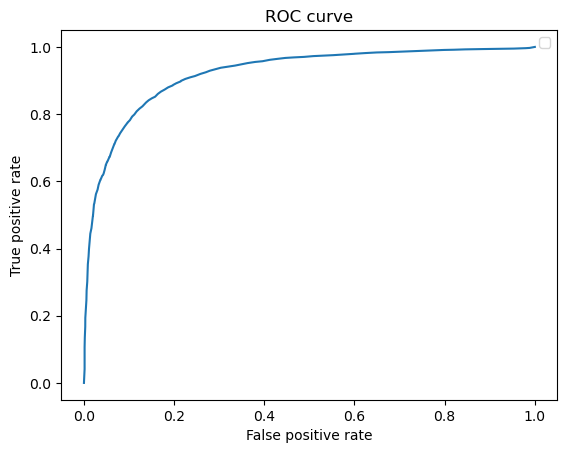

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14601   197]
 [   68 14975]]
 ACCURACY SCORE:
0.9911
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.995364      0.987016   0.99112      0.991190      0.991156
recall         0.986687      0.995480   0.99112      0.991084      0.991120
f1-score       0.991007      0.991230   0.99112      0.991118      0.991119
support    14798.000000  15043.000000   0.99112  29841.000000  29841.000000

 MCC = 0.9822734662721889

 specificity =  0.9866873901878632

 Cohen Kappa =  0.9822367428271982

 F1 Score =  0.9912295217607148

 Precision =  0.987015554969681

 Recall =  0.9954796250747856

 10 fold cv =  0.8410543546598049

 5 fold cv =  0.8325727490829519
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[5207 1138]
 [ 835 5610]]
 ACCURACY SCORE:
0.8457
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.9209086157282848


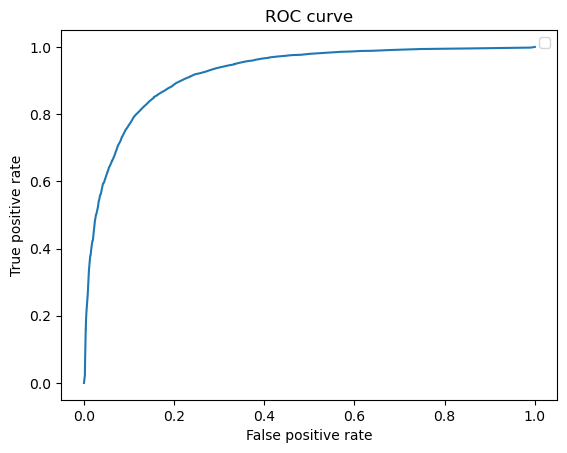

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[14495   387]
 [   23 14305]]
 ACCURACY SCORE:
0.9860
 CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998416      0.973659  0.985964      0.986037      0.986272
recall         0.973995      0.998395  0.985964      0.986195      0.985964
f1-score       0.986054      0.985872  0.985964      0.985963      0.985965
support    14882.000000  14328.000000  0.985964  29210.000000  29210.000000

 MCC = 0.9722325253324536

 specificity =  0.9739954307216772

 Cohen Kappa =  0.9719305933558638

 F1 Score =  0.9858718125430738

 Precision =  0.9736591342227062

 Recall =  0.9983947515354551

 10 fold cv =  0.7721636425881546

 5 fold cv =  0.765624786032181
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[4780 1481]
 [1240 5018]]
 ACCURACY SCORE:
0.7827
 CLASSIFICATION REPORT:
                     0           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 RoC AUC Score::  0.8518891442655685


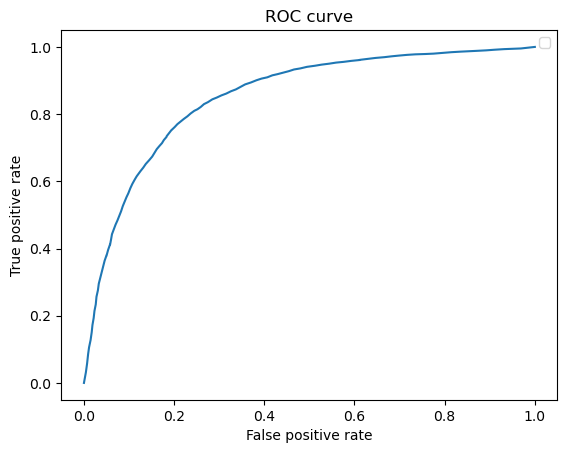

In [52]:
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
et_clf.fit(x_tr, y_tr)
evaluate(et_clf, x_tr, x_te, y_tr, y_te)
et_clf.fit(x_trains1, y_trains1)
evaluate(et_clf, x_trains1, x_tests1, y_trains1, y_tests1)
et_clf.fit(x_trains2, y_trains2)
evaluate(et_clf, x_trains2, x_tests2, y_trains2, y_tests2)
et_clf.fit(x_traina1, y_traina1)
evaluate(et_clf, x_traina1, x_testa1, y_traina1, y_testa1)
et_clf.fit(x_traina2, y_traina2)
evaluate(et_clf, x_traina2, x_testa2, y_traina2, y_testa2)

In [26]:
xf=x[['LIMIT_BAL','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','pay_avg','bill_amt_avg']]
xf

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,pay_avg,bill_amt_avg
0,-1.136720,-0.341942,-0.227086,-0.296801,-0.308063,-0.153635,-0.690692
1,-0.365981,-0.341942,-0.213588,-0.240005,-0.244230,0.694835,-0.665997
2,-0.597202,-0.250292,-0.191887,-0.240005,-0.244230,0.185753,-0.443170
3,-0.905498,-0.221191,-0.169361,-0.228645,-0.237846,0.185753,-0.101507
4,-0.905498,-0.221191,1.335034,0.271165,0.266434,-0.153635,-0.422920
...,...,...,...,...,...,...,...
26995,0.404759,0.171250,0.611048,-0.012648,-0.113564,0.185753,1.200047
26996,-0.134759,-0.231032,-0.103955,0.214255,-0.299828,-0.493024,-0.655182
26997,-1.059646,-0.341942,-0.256990,0.952725,-0.039964,1.543306,-0.525257
26998,-0.674276,4.844316,-0.109033,-0.229895,-0.185120,0.016059,-0.008564


In [27]:
y

,Y
0,1
1,1
2,0
3,0
4,0
...,...
26995,0
26996,0
26997,1
26998,1


In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(xf, y)

print(clf.best_params_)

print(clf.best_score_)